In [1544]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
5       5  7.24  35.0                   49%        12.47                  NaN   
6       6  7.25  35.0                   48%        12.47               108.97   
7       7  7.29  35.0                   56%        12.47                  NaN   
8       8  7.29  35.0                   49%        12.47               108.97   
9       9  7.24  35.0                   47%        12.47                  NaN   
10     10  7.25  35.0                   55%        12.47               108.97   
11     11  7.38  35.0       

Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0     0  7.03  35.0                     -          NaN                  NaN   
1     1  7.08  35.0                   43%        12.47                  NaN   
2     2  7.22  35.0                   53%        12.47               108.97   
3     3  7.22  35.0                   50%        12.47                  NaN   
4     4  7.24  35.0                   49%        12.47               108.97   

   Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  TCOD removal(%)  SCOD removal(%)  \
0                 NaN        NaN        NaN              NaN              NaN   
1                 NaN        NaN        NaN              NaN              NaN   
2               16.41      16.41      74.94             31.0              NaN   
3                 NaN        NaN        NaN              NaN              NaN   
4               16.41      17.33      61.65             43.0              NaN   

   C/N ratio  Butanol  Acetate  Propionate  i-Butyrate  n-Butyrate  Total VFA  \
0        NaN      0.0      0.0         0.0         0.0         0.0        0.0   
1        NaN      NaN      NaN         NaN         NaN         NaN        NaN   
2      19.46     60.0    147.0        86.0       120.0       111.0      465.0   
3        NaN      NaN      NaN         NaN         NaN         NaN        NaN   
4      16.24     44.0    780.0       231.0       123.0       772.0     1906.0   

       TN     TAN     TKN  NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
0     NaN     NaN  4846.0  1477.0            NaN             NaN   
1     NaN     NaN     NaN     NaN            NaN             NaN   
2  3852.0  2500.0  3852.0  2500.0           26.0            26.0   
3     NaN     NaN     NaN     NaN            NaN             NaN   
4  3796.0  2230.0  3796.0  2230.0           16.0            18.0   

   Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)  TS(g/L)  VS(g/L)  \
0                NaN               NaN               NaN      NaN      NaN   
1                NaN               NaN               NaN      NaN      NaN   
2               26.0             65.18             108.3    60.37    40.57   
3                NaN               NaN               NaN      NaN      NaN   
4               18.0             65.18             108.3    47.85    30.82   

  VS/TS(%)  TS removal(%)  VS removal(%)  OLR (g-VS/(L· d))   MPR     MY  \
0      NaN            NaN            NaN                NaN  0.00    NaN   
1      NaN            NaN            NaN                NaN  0.27  107.0   
2      67%           44.0           38.0               2.17  0.26  106.0   
3      NaN            NaN            NaN                NaN  0.23   91.0   
4      64%           56.0           53.0               2.17  0.16   66.0   

    BPR     BY  
0   NaN    NaN  
1  0.63  251.0  
2  0.50  202.0  
3  0.45  181.0  
4  0.33  134.0

In [1545]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  6.99  35.0                     -          NaN                  NaN   
1       1  7.30  35.0                   59%        12.47                  NaN   
2       2  7.27  35.0                   63%        12.47               108.97   
3       3  7.28  35.0                   56%        12.47                  NaN   
4       4  7.22  35.0                   59%        12.47               108.97   
5       5  7.25  35.0                   60%        12.47                  NaN   
6       6  7.23  35.0                   51%        12.47               108.97   
7       7  7.25  35.0                   59%        12.47                  NaN   
8       8  7.22  35.0                   51%        12.47               108.97   
9       9  7.38  35.0                    3%        12.47                  NaN   
10     10  7.40  35.0                    0%        12.47               108.97   
11     11  7.36  35.0       

Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0     0  6.99  35.0                     -          NaN                  NaN   
1     1  7.30  35.0                   59%        12.47                  NaN   
2     2  7.27  35.0                   63%        12.47               108.97   
3     3  7.28  35.0                   56%        12.47                  NaN   
4     4  7.22  35.0                   59%        12.47               108.97   

   Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  TCOD removal(%)  SCOD removal(%)  \
0                 NaN        NaN        NaN              NaN              NaN   
1                 NaN        NaN        NaN              NaN              NaN   
2               16.41      13.05      70.66             35.0             20.0   
3                 NaN        NaN        NaN              NaN              NaN   
4               16.41      14.82      58.58             46.0             10.0   

   C/N ratio  Butanol  Acetate  Propionate  i-Butyrate  n-Butyrate  Total VFA  \
0        NaN      NaN      NaN         NaN         NaN         NaN        NaN   
1        NaN      NaN      NaN         NaN         NaN         NaN        NaN   
2      18.34      0.0   1219.0       219.0       193.0       958.0        NaN   
3        NaN      NaN      NaN         NaN         NaN         NaN        NaN   
4      15.43      0.0    897.0       188.0       193.0       943.0     2221.0   

       TN     TAN     TKN  NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
0     NaN     NaN  4846.0  1477.0            NaN             NaN   
1     NaN     NaN     NaN     NaN            NaN             NaN   
2  4958.0  2332.0  4958.0  2332.0            3.0             9.0   
3     NaN     NaN     NaN     NaN            NaN             NaN   
4  4734.0  2116.0  4734.0  2116.0            5.0            11.0   

   Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)  TS(g/L)  VS(g/L)  \
0                NaN               NaN               NaN      NaN      NaN   
1                NaN               NaN               NaN      NaN      NaN   
2               10.0             65.18             108.3    28.02     17.5   
3                NaN               NaN               NaN      NaN      NaN   
4               10.0             65.18             108.3    29.13     17.8   

  VS/TS(%)  TS removal(%)  VS removal(%)  OLR (g-VS/(L· d))   MPR     MY  \
0      NaN            NaN            NaN                NaN  0.00    NaN   
1      NaN            NaN            NaN                NaN  0.37  149.0   
2      62%           74.0           73.0               2.17  0.12   47.0   
3      NaN            NaN            NaN                NaN  0.13   52.0   
4      61%           73.0           73.0               2.17  0.12   47.0   

    BPR     BY  
0   NaN    NaN  
1  0.63  251.0  
2  0.19   74.0  
3  0.23   93.0  
4  0.20   79.0

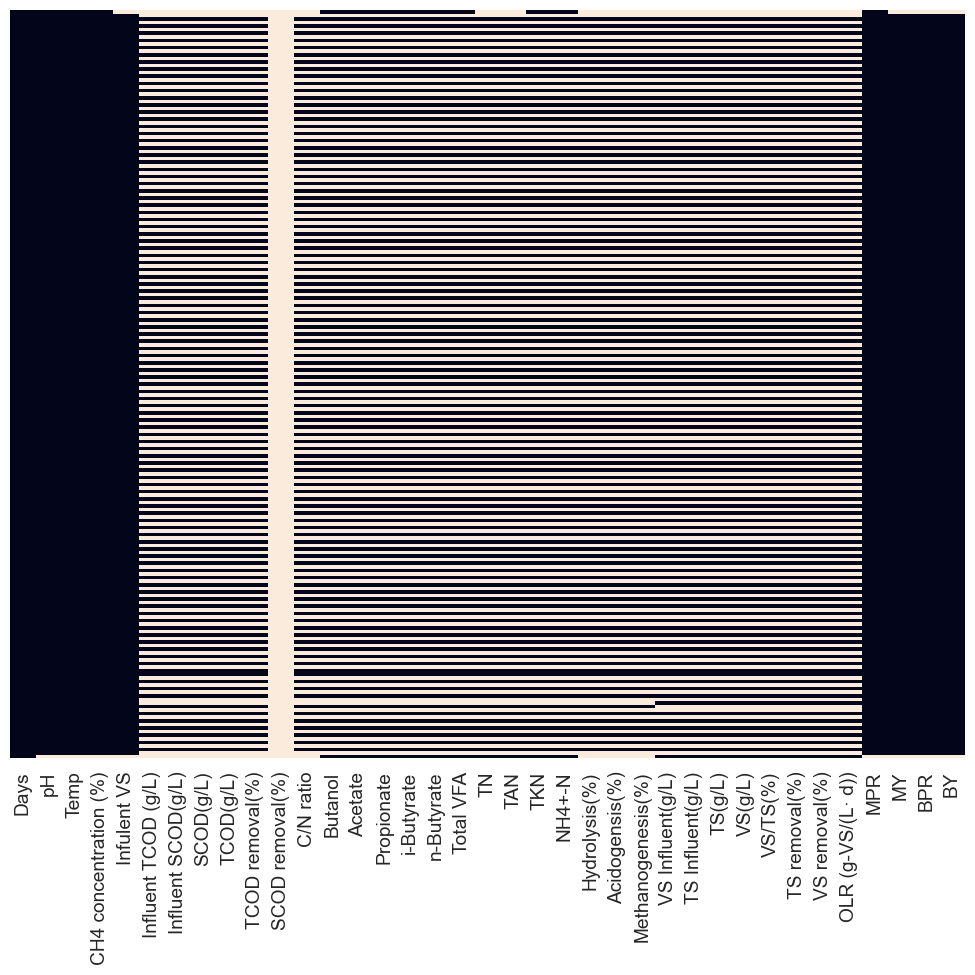

In [1546]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1547]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

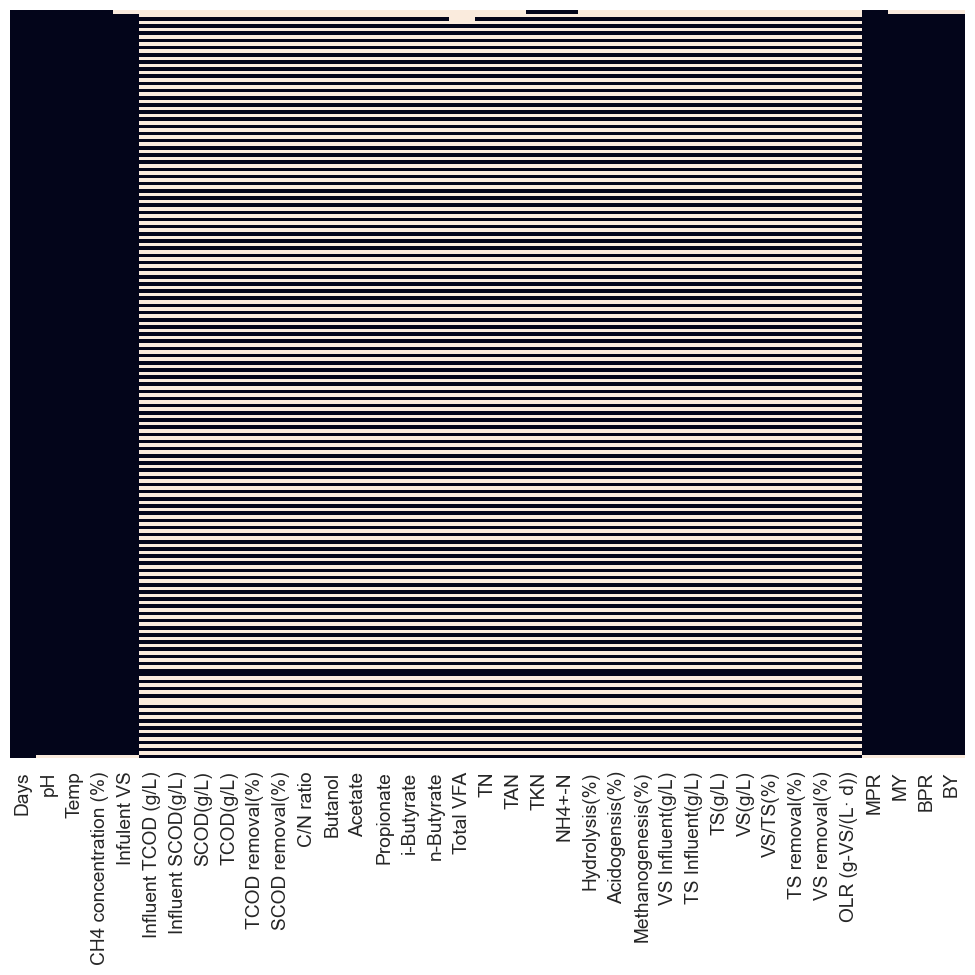

In [1548]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1549]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

In [1550]:
print(train.columns)
print(test.columns)

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')
Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influe

In [1551]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
train.describe()

Days          pH        Temp  Infulent VS  Influent TCOD (g/L)  \
count  209.000000  208.000000  208.000000   207.000000           103.000000   
mean   106.181818    7.410817   34.360577    12.809082           117.871456   
std     64.030833    0.068622    3.986667     0.641962             9.596070   
min      0.000000    7.030000   17.000000    12.470000           103.000000   
25%     52.000000    7.407500   35.000000    12.470000           108.970000   
50%    104.000000    7.430000   35.000000    12.470000           119.000000   
75%    156.000000    7.450000   35.000000    13.280000           125.000000   
max    227.000000    7.620000   39.000000    14.430000           135.000000   

       Influent SCOD(g/L)   SCOD(g/L)   TCOD(g/L)  TCOD removal(%)  \
count          103.000000  103.000000  103.000000       103.000000   
mean            16.547573   11.563204   46.978350        59.815534   
std              4.978048    6.054846   11.844266        10.696112   
min              8.000000    4.000000   20.180000        31.000000   
25%             12.000000    6.240000   40.550000        54.500000   
50%             17.000000    9.550000   44.580000        60.000000   
75%             20.000000   16.190000   55.165000        67.000000   
max             24.640000   32.930000   76.020000        84.000000   

       SCOD removal(%)   C/N ratio      Butanol      Acetate   Propionate  \
count              0.0  103.000000   105.000000   105.000000   105.000000   
mean               NaN   10.370000   180.542857  1539.361905   323.161905   
std                NaN    3.324858   332.810122  1072.613210   213.942620   
min                NaN    4.930000     0.000000     0.000000     0.000000   
25%                NaN    8.375000     0.000000   799.000000   194.000000   
50%                NaN    9.350000    79.000000  1206.000000   281.000000   
75%                NaN   11.115000   120.000000  2258.000000   411.000000   
max                NaN   19.460000  1521.000000  5479.000000  1014.000000   

       i-Butyrate   n-Butyrate    Total VFA           TN          TAN  \
count  105.000000   105.000000   105.000000   104.000000   104.000000   
mean   151.295238   288.333333  2302.209524  4659.942308  3132.769231   
std    111.349582   309.774287  1367.424627   914.625520   758.296702   
min      0.000000     0.000000     0.000000  2353.000000  1419.000000   
25%     74.000000    98.000000  1386.000000  4209.000000  2558.500000   
50%    132.000000   166.000000  1998.000000  4664.000000  3504.000000   
75%    200.000000   270.000000  2777.000000  5158.500000  3732.500000   
max    416.000000  1422.000000  6678.000000  6513.000000  3996.000000   

               TKN       NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
count   105.000000   105.000000     103.000000      103.000000   
mean   4661.714286  3117.000000      48.126214       49.398058   
std     910.398747   771.748091      18.182452       16.210829   
min    2353.000000  1419.000000      11.000000       13.000000   
25%    4244.000000  2500.000000      41.000000       42.500000   
50%    4664.000000  3503.000000      51.000000       51.000000   
75%    5141.000000  3731.000000      58.000000       58.000000   
max    6513.000000  3996.000000      88.000000       88.000000   

       Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)     TS(g/L)  \
count         103.000000        104.000000        104.000000  104.000000   
mean           48.155340         83.126154        109.654038   43.496058   
std            16.078702         14.656012         11.220153    8.426847   
min            12.000000         60.100000         86.400000   21.850000   
25%            40.000000         66.600000        104.100000   40.385000   
50%            49.000000         88.100000        109.500000   44.590000   
75%            56.000000         94.500000        119.100000   46.470000   
max            85.000000        105.100000        124.200000   63.210000   

          VS(g/L)  TS removal(%)  VS r

In [1552]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
test.describe()

Days          pH        Temp  Infulent VS  Influent TCOD (g/L)  \
count  209.000000  208.000000  208.000000   207.000000           104.000000   
mean   106.181818    7.419423   34.057692    12.809082           117.973654   
std     64.030833    0.057008    3.907943     0.641962             9.606079   
min      0.000000    6.990000   17.000000    12.470000           103.000000   
25%     52.000000    7.410000   35.000000    12.470000           108.970000   
50%    104.000000    7.430000   35.000000    12.470000           119.000000   
75%    156.000000    7.450000   35.000000    13.280000           125.000000   
max    227.000000    7.640000   36.000000    14.430000           135.000000   

       Influent SCOD(g/L)   SCOD(g/L)   TCOD(g/L)  TCOD removal(%)  \
count          104.000000  104.000000  104.000000       104.000000   
mean            16.465385    7.970385   43.401827        62.817308   
std              5.024230    3.122295    9.741465         9.318282   
min              8.000000    2.530000   19.250000        35.000000   
25%             12.000000    5.465000   38.382500        56.000000   
50%             17.000000    7.410000   42.360000        64.000000   
75%             20.000000   10.130000   48.622500        69.000000   
max             24.640000   15.230000   70.660000        85.000000   

       SCOD removal(%)   C/N ratio     Butanol      Acetate  Propionate  \
count       104.000000  104.000000  104.000000   104.000000  104.000000   
mean         48.125000    9.638942   35.903846  1544.480769  324.250000   
std          22.791877    2.807373   41.847044   805.266849  152.241106   
min         -23.000000    4.710000    0.000000   297.000000   99.000000   
25%          33.000000    7.882500    0.000000   837.000000  225.000000   
50%          52.000000    8.890000    0.000000  1437.000000  281.500000   
75%          68.000000   10.380000   74.250000  2159.250000  369.500000   
max          80.000000   18.340000  134.000000  3571.000000  867.000000   

       i-Butyrate  n-Butyrate    Total VFA           TN          TAN  \
count  104.000000  104.000000   103.000000   104.000000   104.000000   
mean   125.278846  191.163462  2181.310680  4300.903846  2934.019231   
std     51.309731  215.850996   952.562612   692.229570   708.172158   
min     27.000000   20.000000   658.000000  2227.000000  1045.000000   
25%     84.500000   72.250000  1361.000000  4044.500000  2746.500000   
50%    124.000000  119.000000  2060.000000  4524.000000  3143.500000   
75%    176.250000  203.000000  3077.000000  4734.000000  3411.750000   
max    226.000000  958.000000  4639.000000  5183.000000  3863.000000   

               TKN       NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
count   105.000000   105.000000     104.000000      104.000000   
mean   4306.095238  2920.142857      45.567308       47.903846   
std     690.944330   718.960192      23.789842       21.488547   
min    2227.000000  1045.000000       1.000000        9.000000   
25%    4076.000000  2634.000000      24.250000       30.000000   
50%    4538.000000  3142.000000      55.000000       55.000000   
75%    4734.000000  3409.000000      60.000000       62.000000   
max    5183.000000  3863.000000      90.000000       89.000000   

       Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)     TS(g/L)  \
count         104.000000        104.000000        104.000000  104.000000   
mean           46.807692         83.126154        109.654038   41.124038   
std            21.602803         14.656012         11.220153    8.677146   
min             8.000000         60.100000         86.400000   19.290000   
25%            28.500000         66.600000        104.100000   36.697500   
50%            55.000000         88.100000        109.500000   41.020000   
75%            62.000000         94.500000        119.100000   47.850000   
max            87.000000        105.100000        124.200000   55.370000   

          VS(g/L)  TS removal(%)  VS removal(%)  OLR (g-VS/(L· d)

In [1553]:
# ND轉換NA
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")

train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

train = train.iloc[2:].reset_index(drop=True)
test = test.iloc[2:].reset_index(drop=True)

# train = train.interpolate(method="linear", limit_direction="both")
# test = test.interpolate(method="linear", limit_direction="backward")

test["Total VFA"] = test["Total VFA"].interpolate(method="linear", limit_direction="both")

# 找到缺失值的索引位置
missing_indexes = test.index[test["Total VFA"].isnull()]

# 對最前面的兩個連續缺失值進行填充
for index in missing_indexes:
    if index < 2:
        # 使用最接近的兩個非缺失值的平均值填充
        previous_value = test.loc[index-1, "Total VFA"]
        next_value = test.loc[index+1, "Total VFA"]
        average = np.mean([previous_value, next_value])
        test.loc[index, "Total VFA"] = average


#看數據維度
print(train.shape)
print(test.shape)


(207, 37)
(207, 37)


In [1554]:
print (train)
train.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.22  35.0                   0.53        12.47   
1       3  7.22  35.0                   0.50        12.47   
2       4  7.24  35.0                   0.49        12.47   
3       5  7.24  35.0                   0.49        12.47   
4       6  7.25  35.0                   0.48        12.47   
5       7  7.29  35.0                   0.56        12.47   
6       8  7.29  35.0                   0.49        12.47   
7       9  7.24  35.0                   0.47        12.47   
8      10  7.25  35.0                   0.55        12.47   
9      11  7.38  35.0                   0.61        12.47   
10     12  7.33  35.0                   0.60        12.47   
11     13  7.34  35.0                   0.55        12.47   
12     14  7.30  35.0                   0.57        12.47   
13     15  7.40  35.0                   0.58        12.47   
14     16  7.44  35.0                   0.59        12.47   
15     17  7.40  35.0   

Days    pH  Temp  CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0     2  7.22  35.0                   0.53        12.47               108.97   
1     3  7.22  35.0                   0.50        12.47               108.97   
2     4  7.24  35.0                   0.49        12.47               108.97   
3     5  7.24  35.0                   0.49        12.47               108.97   
4     6  7.25  35.0                   0.48        12.47               108.97   

   Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  TCOD removal(%)  SCOD removal(%)  \
0               16.41      16.41     74.940             0.31              0.0   
1               16.41      16.87     68.295             0.37              0.0   
2               16.41      17.33     61.650             0.43              0.0   
3               16.41      17.61     60.800             0.44              0.0   
4               16.41      17.89     59.950             0.45              0.0   

   C/N ratio  Butanol  Acetate  Propionate  i-Butyrate  n-Butyrate  Total VFA  \
0     0.1946     60.0    147.0        86.0       120.0       111.0      465.0   
1     0.1785     52.0    463.5       158.5       121.5       441.5     1185.5   
2     0.1624     44.0    780.0       231.0       123.0       772.0     1906.0   
3     0.1763     22.0    723.0       212.5       140.0       718.5     1793.5   
4     0.1902      0.0    666.0       194.0       157.0       665.0     1681.0   

       TN     TAN     TKN  NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
0  3852.0  2500.0  3852.0  2500.0          0.260           0.260   
1  3824.0  2365.0  3824.0  2365.0          0.210           0.220   
2  3796.0  2230.0  3796.0  2230.0          0.160           0.180   
3  3474.0  2170.5  3474.0  2170.5          0.135           0.155   
4  3152.0  2111.0  3152.0  2111.0          0.110           0.130   

   Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)  TS(g/L)  VS(g/L)  \
0               0.26             65.18             108.3    60.37   40.570   
1               0.22             65.18             108.3    54.11   35.695   
2               0.18             65.18             108.3    47.85   30.820   
3               0.15             65.18             108.3    47.28   29.735   
4               0.12             65.18             108.3    46.71   28.650   

   VS/TS(%)  TS removal(%)  VS removal(%)  OLR (g-VS/(L· d))   MPR     MY  \
0     0.670          0.440          0.380               2.17  0.26  106.0   
1     0.655          0.500          0.455               2.17  0.23   91.0   
2     0.640          0.560          0.530               2.17  0.16   66.0   
3     0.625          0.565          0.545               2.17  0.13   51.0   
4     0.610          0.570          0.560               2.17  0.11   46.0   

    BPR     BY  
0  0.50  202.0  
1  0.45  181.0  
2  0.33  134.0  
3  0.26  103.0  
4  0.24   95.0

In [1555]:
print (test)
test.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.27  35.0                   0.63        12.47   
1       3  7.28  35.0                   0.56        12.47   
2       4  7.22  35.0                   0.59        12.47   
3       5  7.25  35.0                   0.60        12.47   
4       6  7.23  35.0                   0.51        12.47   
5       7  7.25  35.0                   0.59        12.47   
6       8  7.22  35.0                   0.51        12.47   
7       9  7.38  35.0                   0.03        12.47   
8      10  7.40  35.0                   0.00        12.47   
9      11  7.36  35.0                   0.07        12.47   
10     12  7.24  35.0                   0.17        12.47   
11     13  7.29  35.0                   0.30        12.47   
12     14  7.35  35.0                   0.41        12.47   
13     15  7.39  35.0                   0.53        12.47   
14     16  7.40  35.0                   0.52        12.47   
15     17  7.40  35.0   

Days    pH  Temp  CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0     2  7.27  35.0                   0.63        12.47               108.97   
1     3  7.28  35.0                   0.56        12.47               108.97   
2     4  7.22  35.0                   0.59        12.47               108.97   
3     5  7.25  35.0                   0.60        12.47               108.97   
4     6  7.23  35.0                   0.51        12.47               108.97   

   Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  TCOD removal(%)  SCOD removal(%)  \
0               16.41     13.050     70.660            0.350            0.200   
1               16.41     13.935     64.620            0.405            0.150   
2               16.41     14.820     58.580            0.460            0.100   
3               16.41     13.585     55.805            0.485            0.175   
4               16.41     12.350     53.030            0.510            0.250   

   C/N ratio  Butanol  Acetate  Propionate  i-Butyrate  n-Butyrate  Total VFA  \
0    0.18340      0.0   1219.0       219.0       193.0       958.0     2221.0   
1    0.16885      0.0   1058.0       203.5       193.0       950.5     2221.0   
2    0.15430      0.0    897.0       188.0       193.0       943.0     2221.0   
3    0.16130      0.0    882.0       202.5       193.0       879.5     2157.0   
4    0.16830      0.0    867.0       217.0       193.0       816.0     2093.0   

       TN     TAN     TKN  NH4+-N  Hydrolysis(%)  Acidogensis(%)  \
0  4958.0  2332.0  4958.0  2332.0          0.030           0.090   
1  4846.0  2224.0  4846.0  2224.0          0.040           0.100   
2  4734.0  2116.0  4734.0  2116.0          0.050           0.110   
3  4475.0  2064.5  4475.0  2064.5          0.035           0.105   
4  4216.0  2013.0  4216.0  2013.0          0.020           0.100   

   Methanogenesis(%)  VS Influent(g/L)  TS Influent(g/L)  TS(g/L)  VS(g/L)  \
0                0.1             65.18             108.3   28.020    17.50   
1                0.1             65.18             108.3   28.575    17.65   
2                0.1             65.18             108.3   29.130    17.80   
3                0.1             65.18             108.3   29.155    17.61   
4                0.1             65.18             108.3   29.180    17.42   

   VS/TS(%)  TS removal(%)  VS removal(%)  OLR (g-VS/(L· d))   MPR    MY  \
0     0.620          0.740           0.73               2.17  0.12  47.0   
1     0.615          0.735           0.73               2.17  0.13  52.0   
2     0.610          0.730           0.73               2.17  0.12  47.0   
3     0.605          0.730           0.73               2.17  0.10  42.0   
4     0.600          0.730           0.73               2.17  0.09  38.0   

    BPR    BY  
0  0.19  74.0  
1  0.23  93.0  
2  0.20  79.0  
3  0.17  70.0  
4  0.18  74.0

In [1556]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [1557]:
# #異常值處理
# train = train.drop(train[(train['SCOD(g/L)']>30) & (train['MY']<200)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [1558]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['Acetate'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [1559]:
# #異常值處理
# train = train.drop(train[(train['Acetate']>5000) & (train['MY']<250)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['Acetate'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [1560]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [1561]:
# #異常值處理
# test = test.drop(test[(test['n-Butyrate']>838.7) & (test['MY']<100)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [1562]:
# # 使用線性插值來填充缺失的值
# train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
# test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")


# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")


In [1563]:
# # 找到Butanol列中的最低值
# butanol_min = train['Butanol'].min()
# butanol_min = test['Butanol'].min()

# # 將Butanol列中為0的值替換為最低值
# train.loc[train['Butanol'] == 0, 'Butanol'] = butanol_min
# test.loc[test['Butanol'] == 0, 'Butanol'] = butanol_min

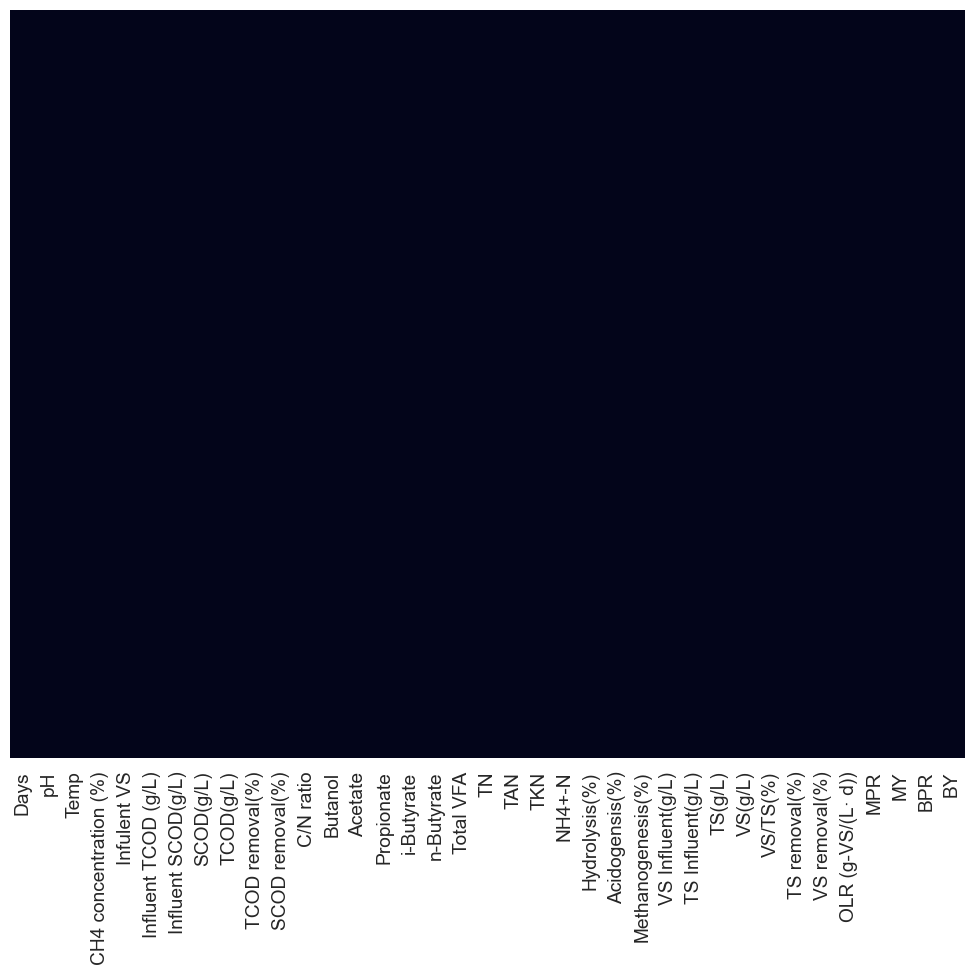

In [1564]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1565]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

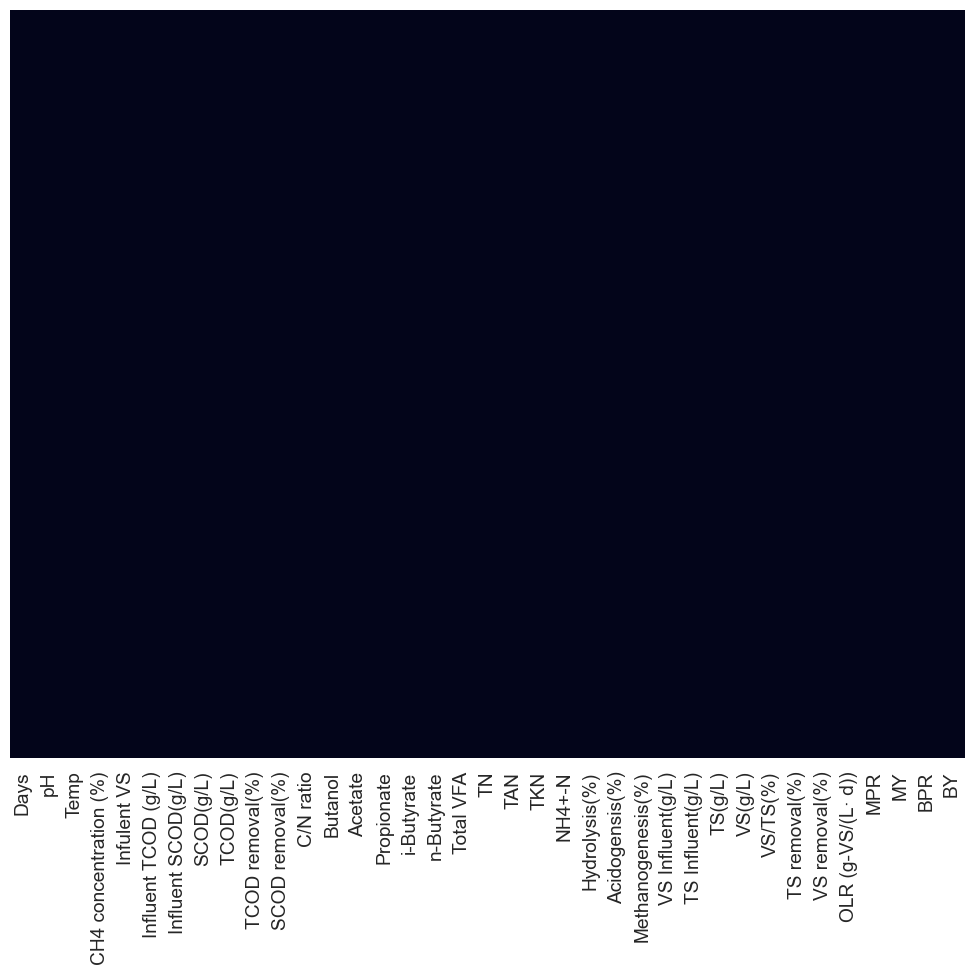

In [1566]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1567]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

In [1568]:
# plt.figure(figsize=(8,5))
# plt.boxplot(train['CH4 concentration (%)'],showmeans=True)
# plt.title('CH4 concentration (%)')
# plt.show()


mu = 0.50 and sigma = 0.18


mu = 195.39 and sigma = 70.66


mu = 0.89 and sigma = 0.32


mu = 349.55 and sigma = 125.19



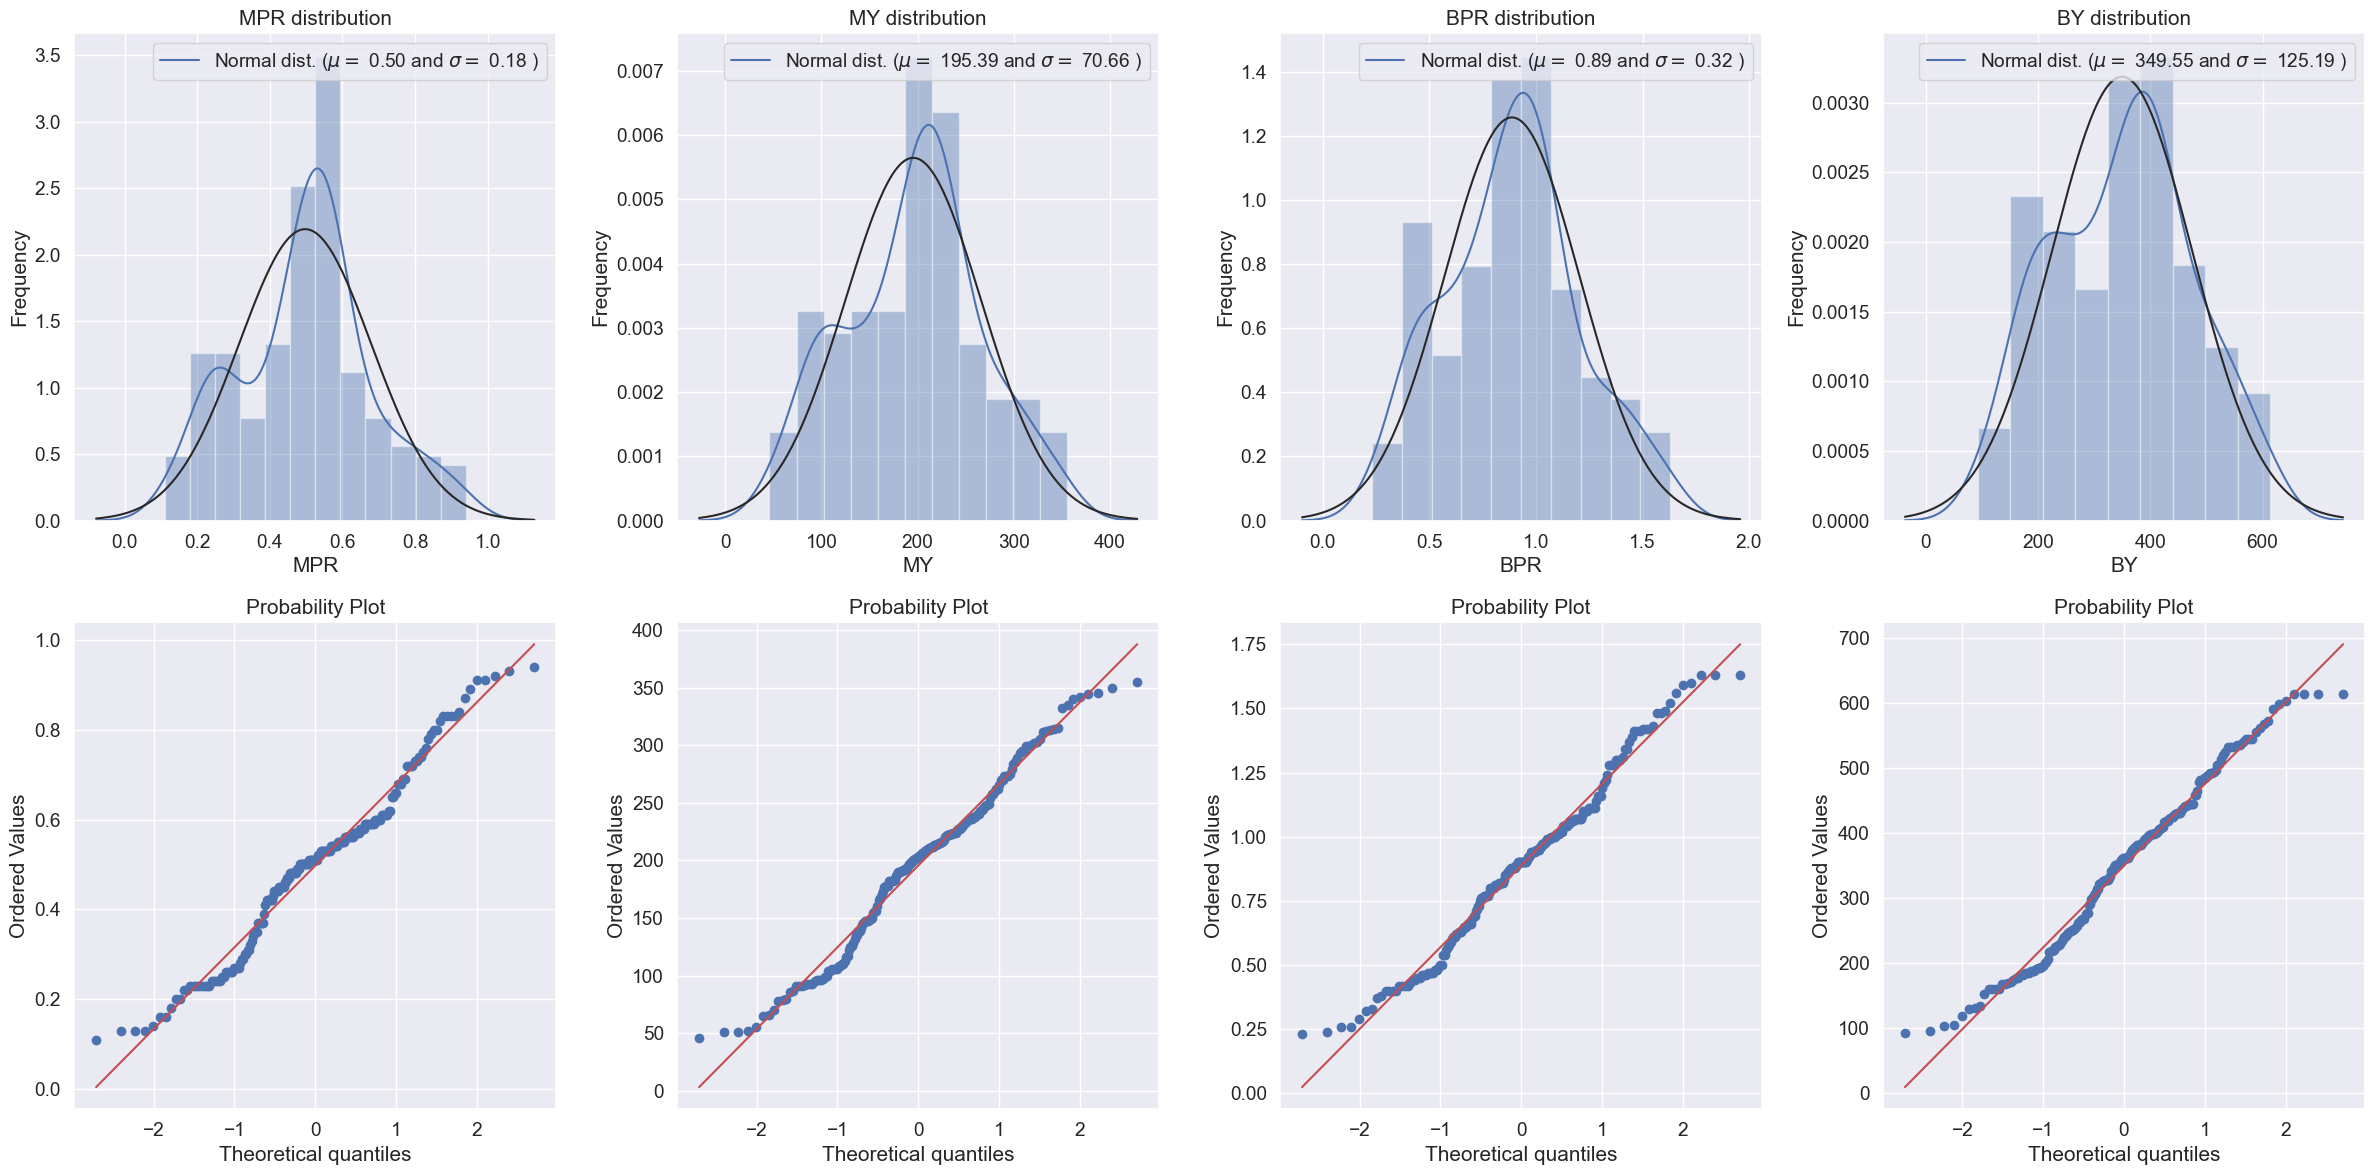

In [1569]:

# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

fig, axs = plt.subplots(2, 4, figsize=(24, 12))  # 創建一個包含8個子圖的圖形窗口

for i, target in enumerate(targets):
    
    # 繪製概率密度函數和核密度估計的圖
    sns.distplot(train[target], fit=norm, ax=axs[0, i])   # 將圖繪製在適當的子圖上
    
    (mu, sigma) = norm.fit(train[target])   # 對變量進行最大似然估計
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    axs[0, i].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    axs[0, i].set_ylabel('Frequency')
    axs[0, i].set_title('{} distribution'.format(target))
    
    # 繪製概率圖
    stats.probplot(train[target], plot=axs[1, i])   # 將圖繪製在適當的子圖上

plt.tight_layout()  # 自動調整子圖的佈局，使之填滿整個圖形窗口
plt.show()



mu = 0.50 and sigma = 0.18



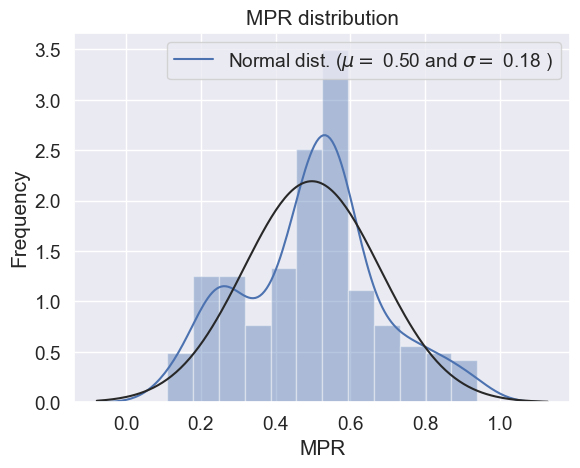

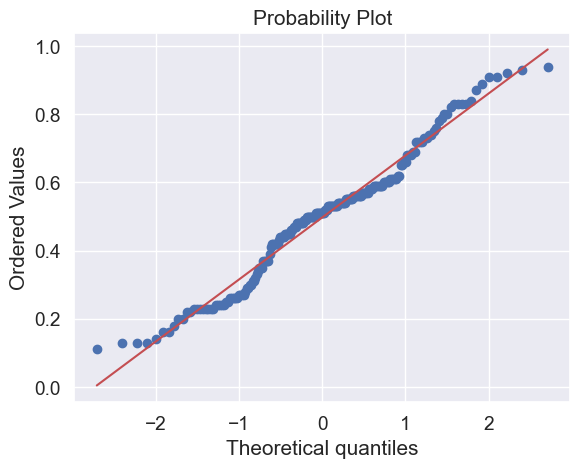


mu = 195.39 and sigma = 70.66



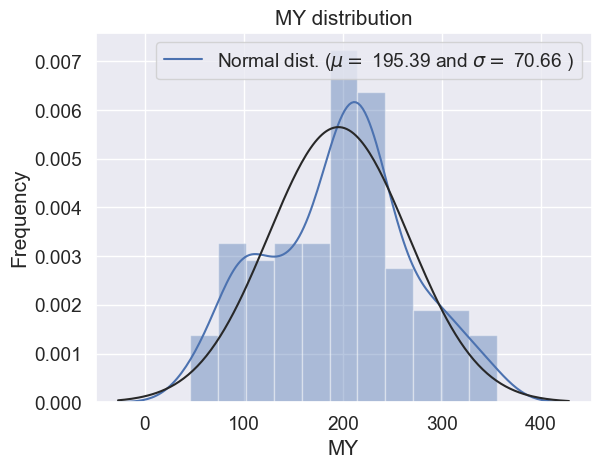

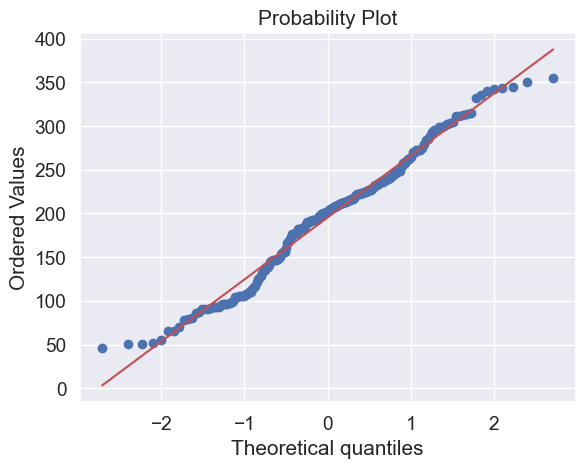


mu = 0.89 and sigma = 0.32



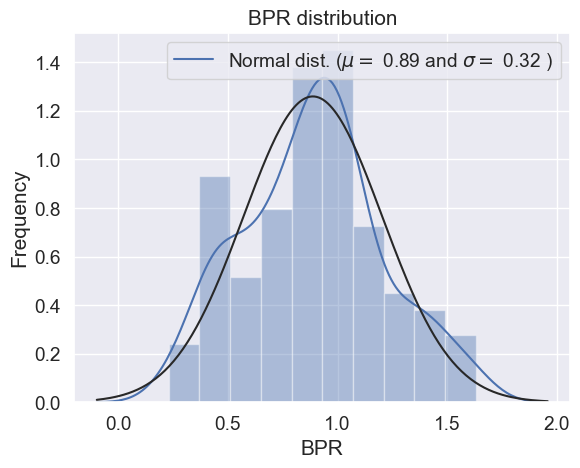

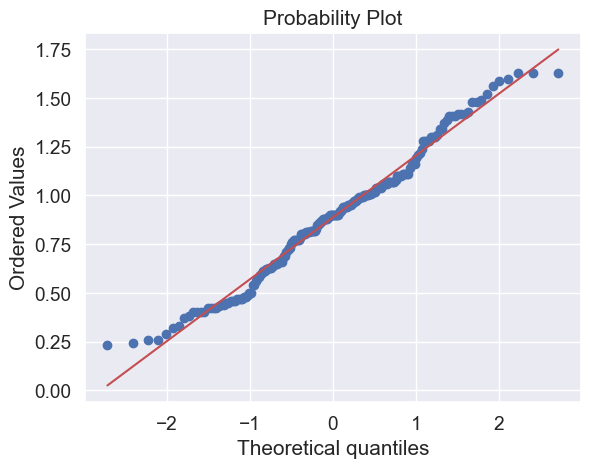


mu = 349.55 and sigma = 125.19



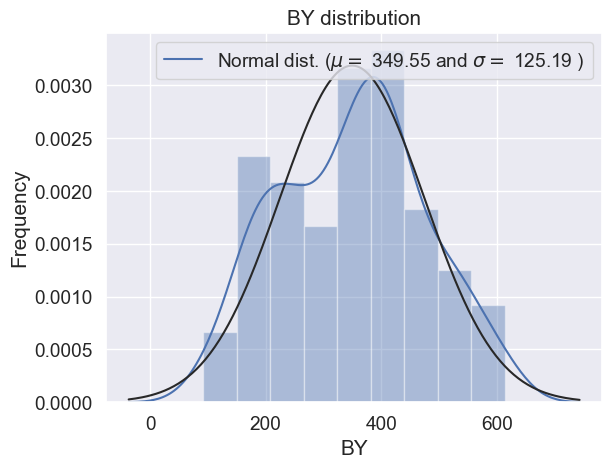

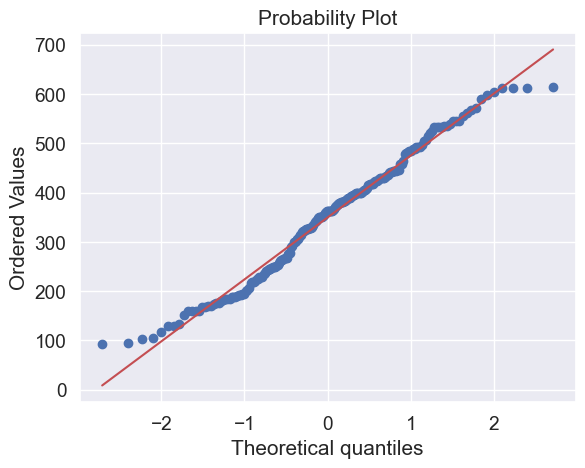

In [1570]:
# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

for target in targets:
    
    sns.distplot(train[target], fit=norm)   #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)
    
    (mu, sigma) = norm.fit(train[target])   #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:正態分布的標準差。
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))   #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')    #plt.legend用於給圖標添加圖例，loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(target))   
    
    fig = plt.figure()  #創建一個新的圖形窗口
    res = stats.probplot(train[target], plot=plt)   #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
    
    plt.show()


mu = 0.50 and sigma = 0.18



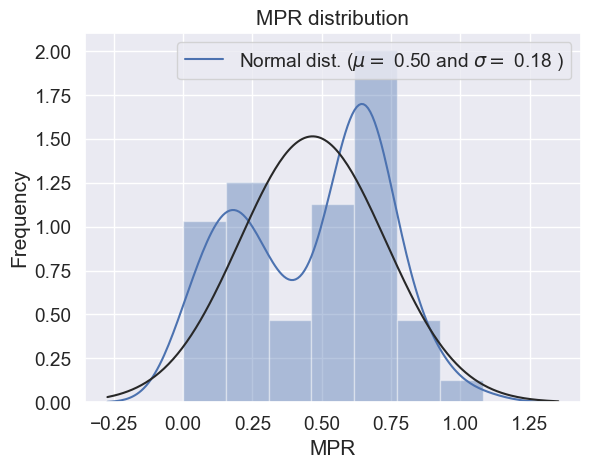

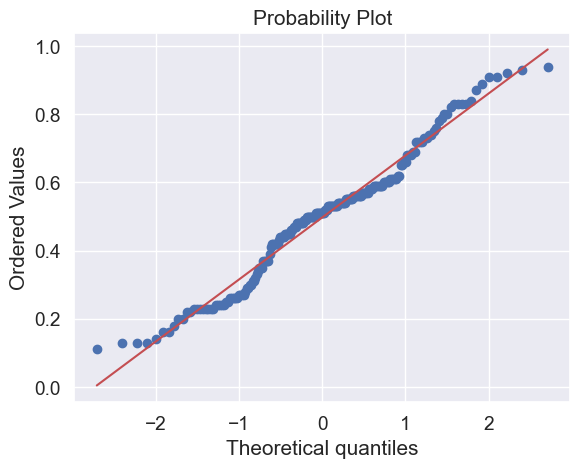


mu = 195.39 and sigma = 70.66



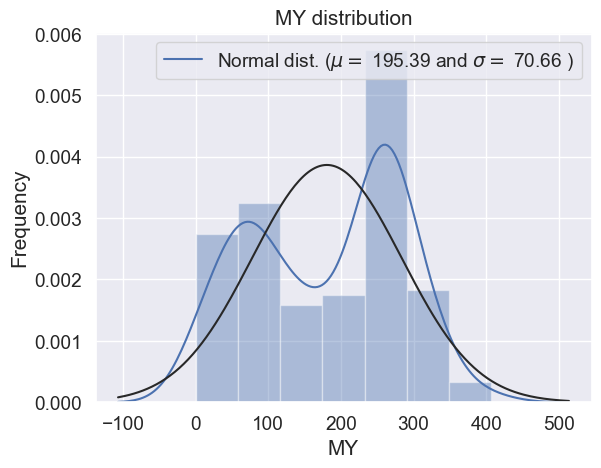

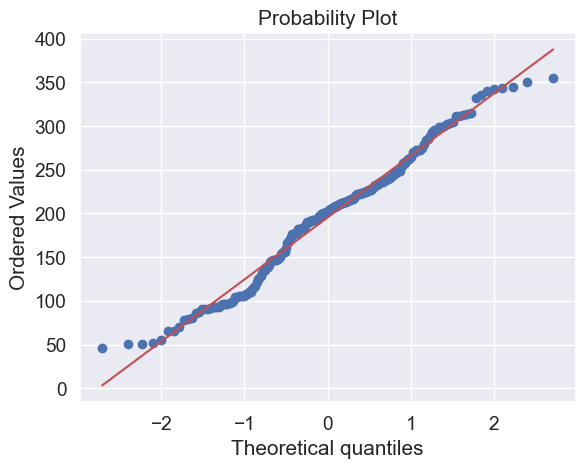


mu = 0.89 and sigma = 0.32



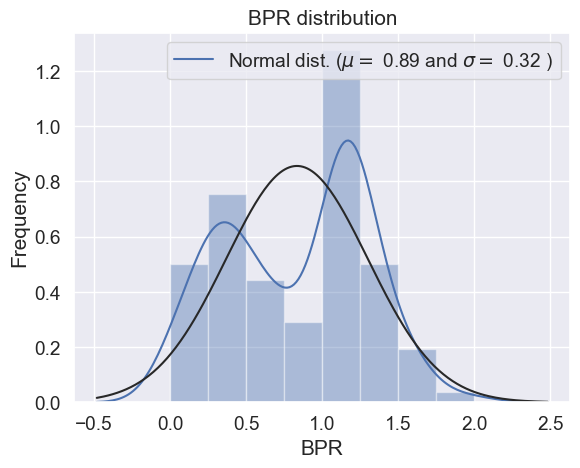

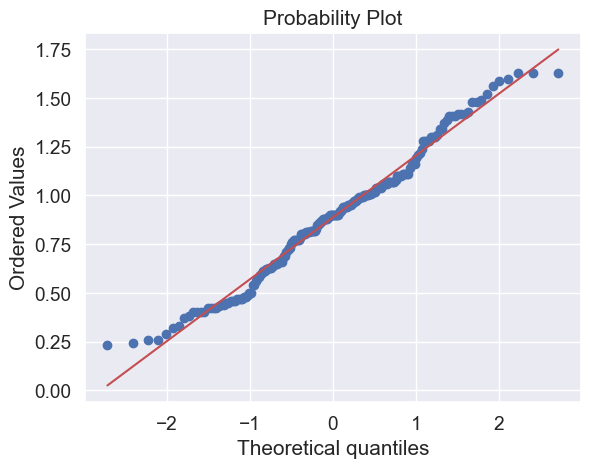


mu = 349.55 and sigma = 125.19



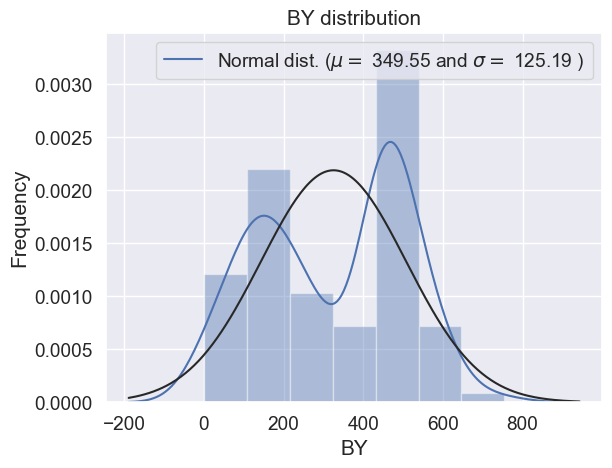

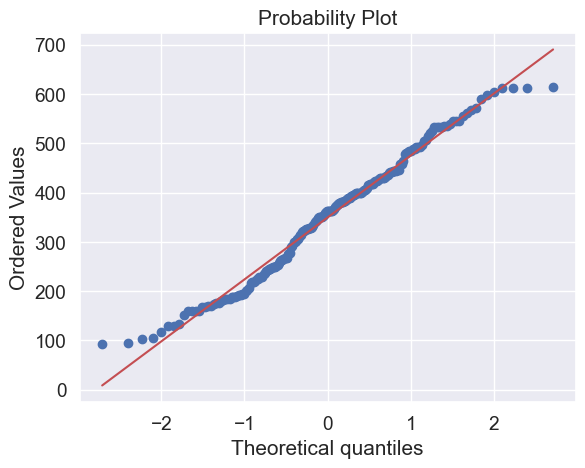

In [1571]:
# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

for target in targets:
    
    sns.distplot(test[target], fit=norm)   #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)
    
    (mu, sigma) = norm.fit(train[target])   #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:正態分布的標準差。
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))   #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')    #plt.legend用於給圖標添加圖例，loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(target))   
    
    fig = plt.figure()  #創建一個新的圖形窗口
    res = stats.probplot(train[target], plot=plt)   #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
    
    plt.show()

In [1572]:
# # log對數變換
# train["MPR"] = np.log1p(train["MPR"])  #np.log1p函數將()變量中的所有值都加上1，然後取對數。可以有效的消除數據中的偏度和峰度。使其更接近正態分佈。

# sns.distplot(train["MPR"] , fit=norm); 
 
# (mu, sigma) = norm.fit(train['MPR'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('SCOD(g/L)')
# plt.title('MPR distribution')
# fig = plt.figure()
# res = stats.probplot(train['MPR'], plot=plt)
# plt.show()

In [1573]:
#對分類變量編碼
from sklearn.preprocessing import LabelEncoder
cols = ('Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
                     'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
                     'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
                     'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
                     'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
                     'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
                     'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
                     'MPR', 'MY', 'BPR', 'BY')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))    

#查看數據維度        
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (207, 37)
Shape all_data: (207, 37)


In [1574]:
##One-HotEncoder
# from sklearn.preprocessing import OneHotEncoder

# # 定義要進行 One-Hot 編碼的欄位
# columns_to_encode = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#                      'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#                      'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#                      'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#                      'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#                      'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#                      'MPR', 'MY', 'BPR', 'BY']

# # 初始化 One-Hot 編碼器
# encoder = OneHotEncoder()

# encoder = OneHotEncoder(handle_unknown='ignore')

# # 對 train 資料進行 One-Hot 編碼
# train_encoded = encoder.fit_transform(train[columns_to_encode])

# # 對 test 資料進行 One-Hot 編碼
# test_encoded = encoder.transform(test[columns_to_encode])

# # 檢查編碼後的資料維度
# print('編碼後訓練資料的維度:', train_encoded.shape)
# print('編碼後測試資料的維度:', test_encoded.shape)


In [1575]:
p_values = []

# 只針對數值型欄位進行操作
for column in train.select_dtypes(include=[np.number]).columns:  
    # 處理NaN值
    train_col = train[column].dropna()
    test_col = test[column].dropna()
    
    # 檢查是否有足夠的樣本
    if len(train_col) < 2 or len(test_col) < 2:
        print(f"欄位 {column} 的數據不足以進行 t 檢定")
        continue
    
    # 使用t檢定比較每個變數
    t_stat, p_val = stats.ttest_ind(train_col, test_col)
    p_values.append(p_val)

# 使用 Bonferroni 方法進行多重比較校正
alpha = 0.05  # 顯著性水平
n_tests = len(p_values)
p_values_corrected = np.array(p_values) * n_tests  # 進行校正

# 打印每個變數及其經過校正的 p 值
for column, p_val in zip(train.select_dtypes(include=[np.number]).columns, p_values_corrected):
    is_significant = p_val < alpha  # 判斷是否顯著
    print(f'{column}: {"顯著" if is_significant else "不顯著"} (p-value: {p_val})')


Days: 不顯著 (p-value: 37.0)
pH: 不顯著 (p-value: 3.1377032669336744)
Temp: 不顯著 (p-value: 0.2519804686150077)
CH4 concentration (%): 顯著 (p-value: 1.809354288428082e-32)
Infulent VS: 不顯著 (p-value: 37.0)
Influent TCOD (g/L): 不顯著 (p-value: 37.0)
Influent SCOD(g/L): 不顯著 (p-value: 37.0)
SCOD(g/L): 不顯著 (p-value: 25.34717761125384)
TCOD(g/L): 不顯著 (p-value: 19.461729440244053)
TCOD removal(%): 不顯著 (p-value: 1.5925085987955476)
SCOD removal(%): 顯著 (p-value: 3.845315048044636e-95)
C/N ratio: 不顯著 (p-value: 24.105531809246653)
Butanol: 顯著 (p-value: 1.570407145927915e-17)
Acetate: 不顯著 (p-value: 0.21037368970175807)
Propionate: 不顯著 (p-value: 3.189829162330139)
i-Butyrate: 不顯著 (p-value: 0.08996728496667557)
n-Butyrate: 不顯著 (p-value: 0.41399564539066125)
Total VFA: 不顯著 (p-value: 23.582974248170455)
TN: 不顯著 (p-value: 0.3368898151709975)
TAN: 不顯著 (p-value: 4.326681196133178)
TKN: 不顯著 (p-value: 0.3368898151709975)
NH4+-N: 不顯著 (p-value: 4.326681196133178)
Hydrolysis(%): 顯著 (p-value: 2.1018696108853458e-08)
Acid

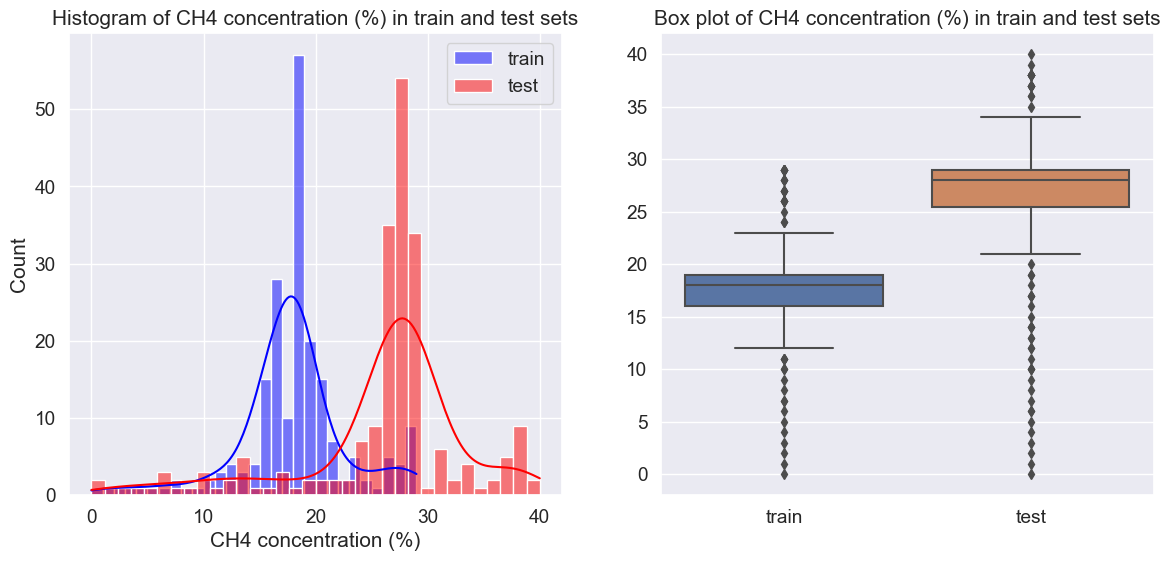

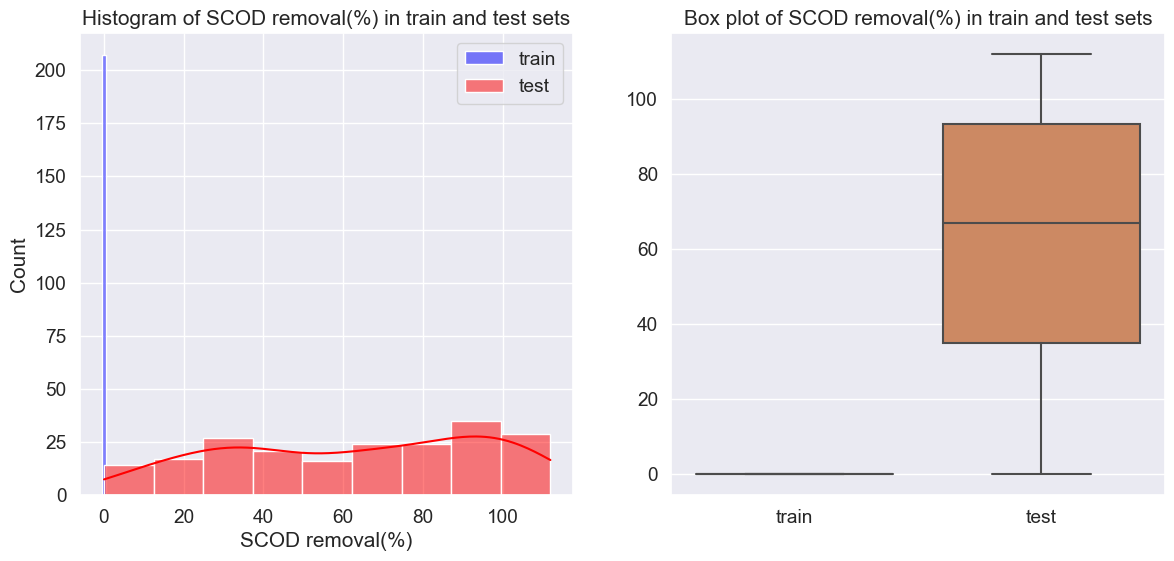

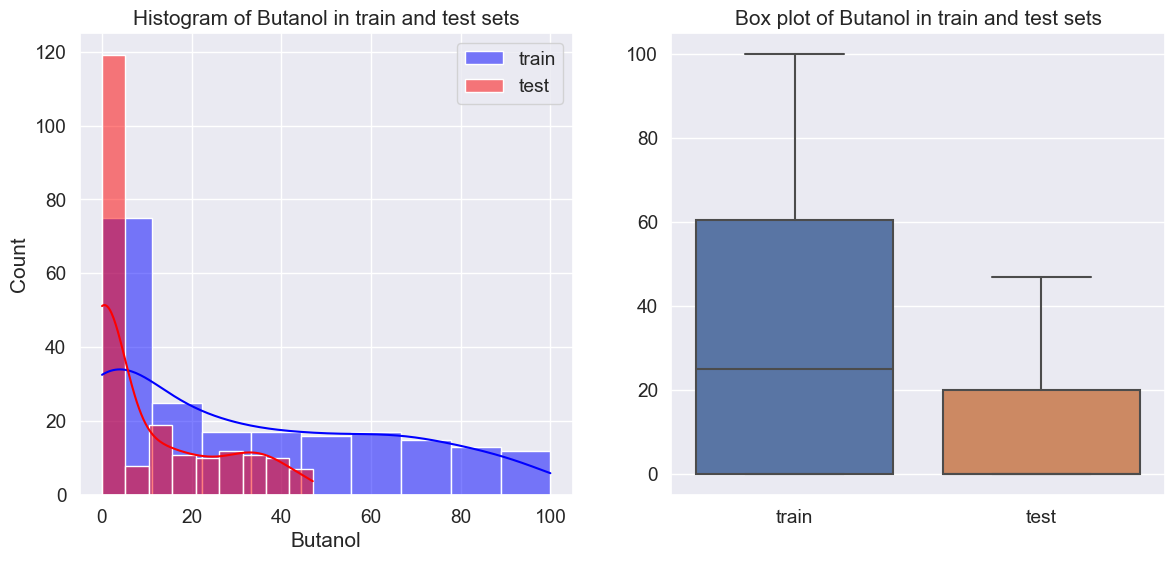

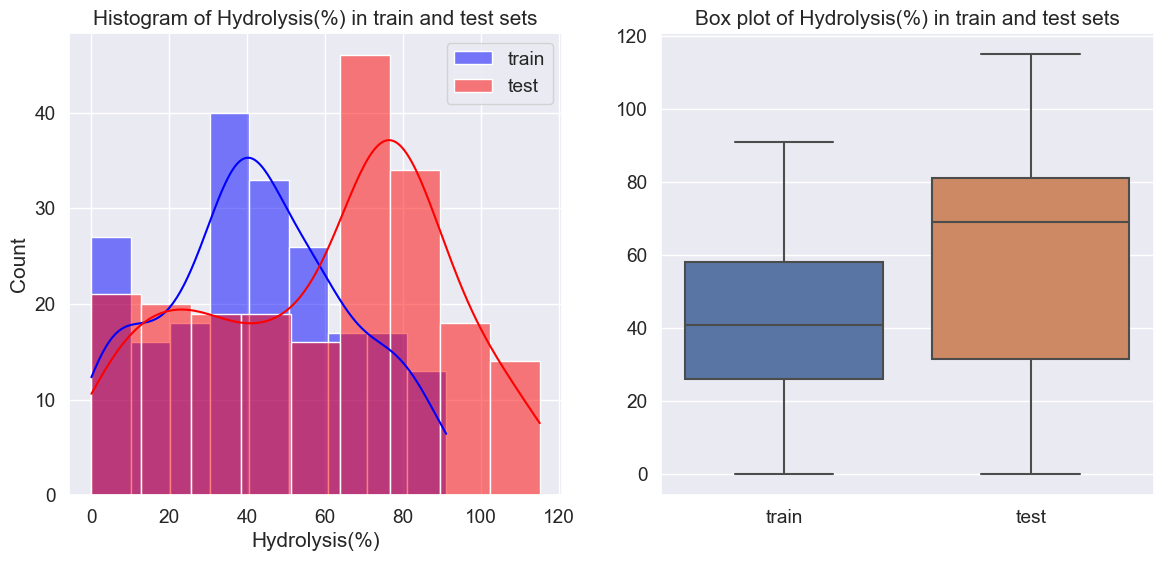

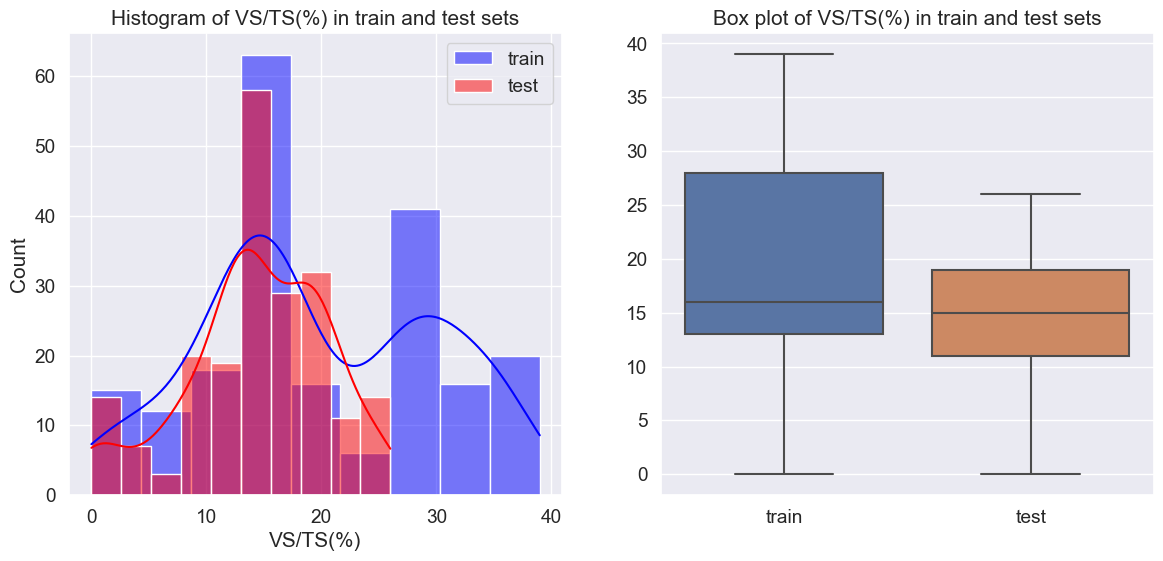

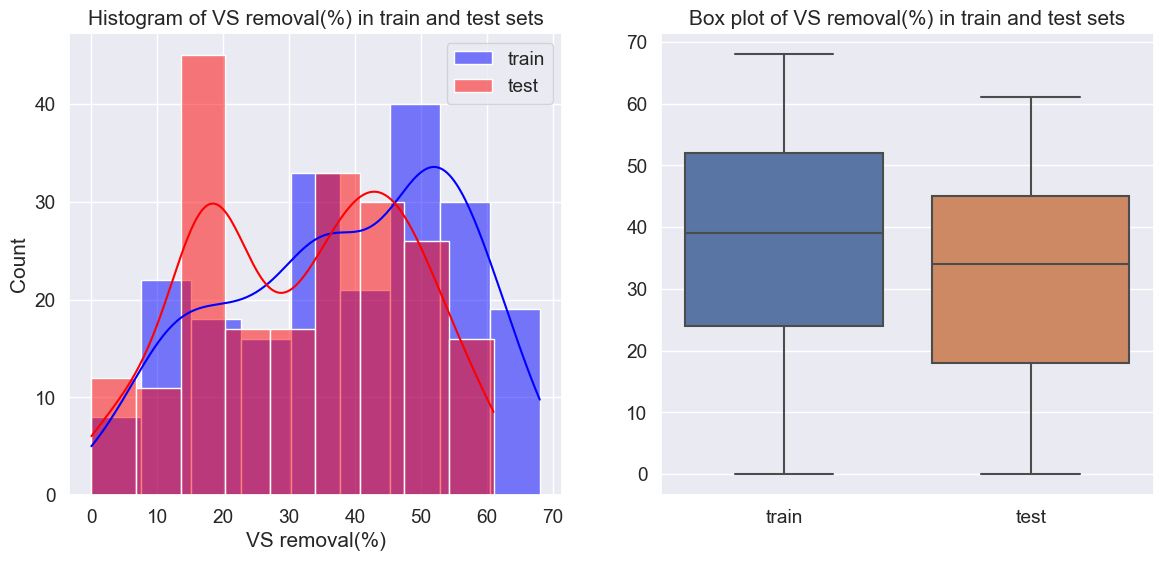

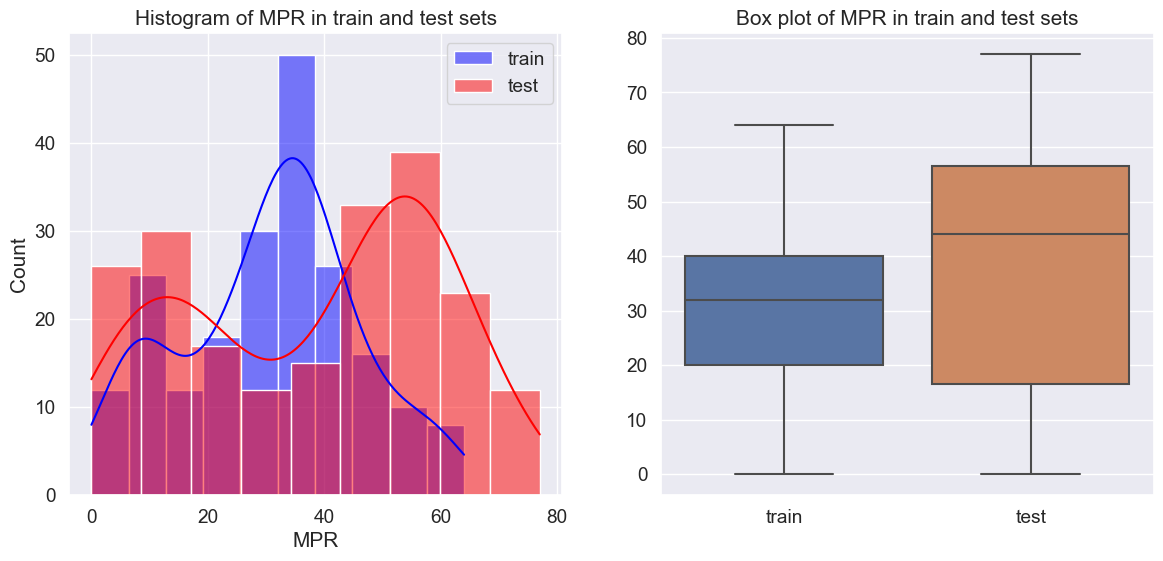

In [1576]:
# 選擇要進一步研究的變量
variables = ['CH4 concentration (%)', 'SCOD removal(%)', 'Butanol', 'Hydrolysis(%)', 'VS/TS(%)', 'VS removal(%)', 'MPR']


# 為每個變量繪製直方圖和箱形圖
for var in variables:
    plt.figure(figsize=(14, 6))
    
    # 繪製直方圖
    plt.subplot(1, 2, 1)
    sns.histplot(train[var], color='blue', label='train', kde=True)
    sns.histplot(test[var], color='red', label='test', kde=True)
    plt.title(f'Histogram of {var} in train and test sets')
    plt.legend()

    # 繪製箱形圖
    plt.subplot(1, 2, 2)
    data = pd.concat([train[var], test[var]], axis=1)
    data.columns = ['train', 'test']
    sns.boxplot(data=data)
    plt.title(f'Box plot of {var} in train and test sets')

    plt.show()


In [1577]:
# # 將顯著的變數作為特徵
# significant_features = ['Methanogenesis(%)', 'Acidogensis(%)', 'Hydrolysis(%)', 'VS Influent(g/L)', 'TS Influent(g/L)', 'OLR (g-VS/(L· d))']
# X_train = train[significant_features]
# y_train = train['MPR']  # 將'MPR'作為目標變數

# # 創建並訓練隨機森林回歸模型
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# # 在測試集上進行預測
# X_test = test[significant_features]
# y_test = test['MPR']
# y_pred = rf_model.predict(X_test)
# # 
# # 評估模型性能
# mse = mean_squared_error(y_test, y_pred)
# r2 = rf_model.score(X_test, y_test)

# print('均方誤差（MSE）：', mse)
# print('決定係數（R-squared）：', r2)


In [1578]:
# #多重比較

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # 創建一個空的DataFrame來存儲結果
# tukey_results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Difference', 'Lower CI', 'Upper CI', 'Reject Null'])

# # 進行所有變數之間的Tukey's HSD比較
# for i in range(len(train.select_dtypes(include=[np.number]).columns)):
#     for j in range(i+1, len(train.select_dtypes(include=[np.number]).columns)):
#         variable_1 = train.select_dtypes(include=[np.number]).columns[i]
#         variable_2 = train.select_dtypes(include=[np.number]).columns[j]
        
#         # 執行Tukey's HSD比較
#         tukey_results = pairwise_tukeyhsd(train[variable_1], train[variable_2])
        
#         # 提取重要結果
#         difference = tukey_results.meandiffs[0]
#         lower_ci = tukey_results.confint[0][0]
#         upper_ci = tukey_results.confint[0][1]
#         reject_null = tukey_results.reject[0]
        
#         # 將結果添加到DataFrame中
#         tukey_results_df = tukey_results_df.append({'Variable 1': variable_1,
#                                                     'Variable 2': variable_2,
#                                                     'Difference': difference,
#                                                     'Lower CI': lower_ci,
#                                                     'Upper CI': upper_ci,
#                                                     'Reject Null': reject_null},
#                                                    ignore_index=True)

# # 打印結果
# print(tukey_results_df)


In [1579]:
#數值型數據
numeric_cols_train = train.columns[train.dtypes !='object']
numeric_cols_train

numeric_cols_test = test.columns[test.dtypes !='object']
numeric_cols_test

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')

In [1580]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_test_mean =test.loc[: ,numeric_cols_test].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_test_std = test.loc[: ,numeric_cols_test].std() #std() 函式計算數值型特徵的標準差
test.loc[: ,numeric_cols_test] = (test.loc[: ,numeric_cols_test] - numeric_cols_test_mean)/numeric_cols_test_std #轉換後的數值型特徵資料儲存在 train 變數中

In [1581]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_train_mean =train.loc[: ,numeric_cols_train].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_train_std = train.loc[: ,numeric_cols_train].std() #std() 函式計算數值型特徵的標準差
train.loc[: ,numeric_cols_train] = (train.loc[: ,numeric_cols_train] - numeric_cols_train_mean)/numeric_cols_train_std #轉換後的數值型特徵資料儲存在 train 變數中

In [1582]:
# # 選擇顯著差異的變數對進行進一步分析
# significant_pairs = tukey_results_df[tukey_results_df['Reject Null']]

# for idx, row in significant_pairs.iterrows():
#     variable_1 = row['Variable 1']
#     variable_2 = row['Variable 2']
    
#     # 可以進行進一步的分析，例如比較兩個變數對的分布或統計量
#     # 假設你想研究 SCOD(g/L) 和 TCOD(g/L) 這兩個變數對的差異
#     if variable_1 == 'SCOD(g/L)' and variable_2 == 'TCOD(g/L)':
#         data_variable_1 = train[variable_1]
#         data_variable_2 = train[variable_2]
        
#         # 可以繪製箱形圖或直方圖來比較兩個變數的分布
#         plt.figure()
#         plt.boxplot([data_variable_1, data_variable_2])
#         plt.xlabel('Variable')
#         plt.ylabel('Value')
#         plt.title('Comparison of SCOD(g/L) and TCOD(g/L)')
#         plt.xticks([1, 2], ['SCOD(g/L)', 'TCOD(g/L)'])
#         plt.show()
        
#         # 可以計算兩個變數的統計量，例如均值、標準差等
#         mean_variable_1 = data_variable_1.mean()
#         mean_variable_2 = data_variable_2.mean()
#         std_variable_1 = data_variable_1.std()
#         std_variable_2 = data_variable_2.std()
        
#         print(f"Variable 1: {variable_1}")
#         print(f"Mean: {mean_variable_1}, Standard Deviation: {std_variable_1}")
#         print(f"Variable 2: {variable_2}")
#         print(f"Mean: {mean_variable_2}, Standard Deviation: {std_variable_2}")


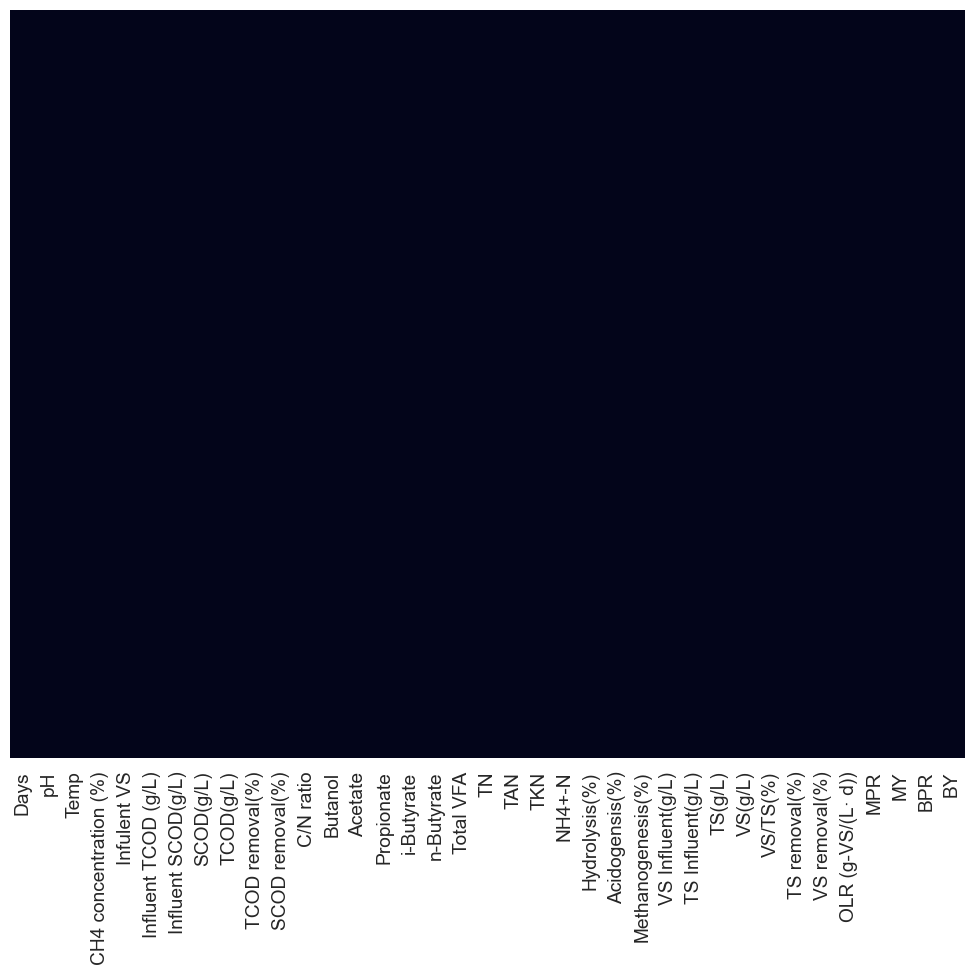

In [1583]:
#isnull()看數據缺失值
train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1584]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

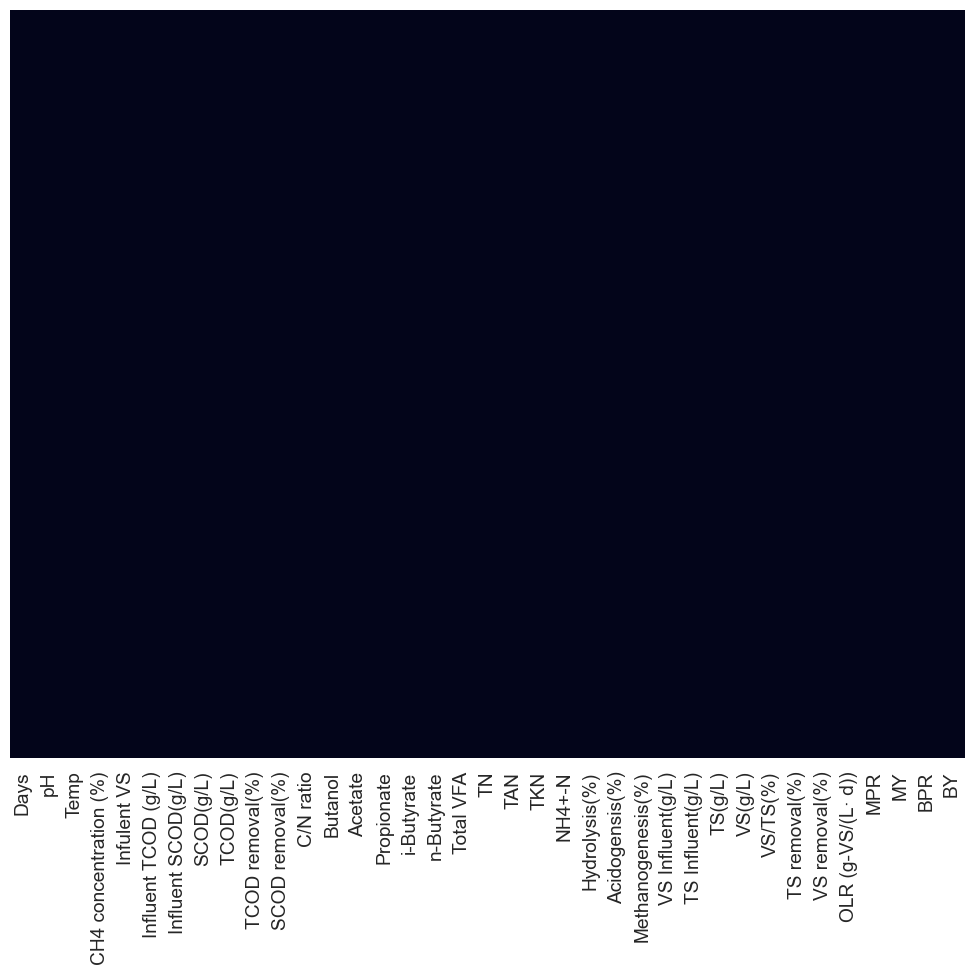

In [1585]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [1586]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

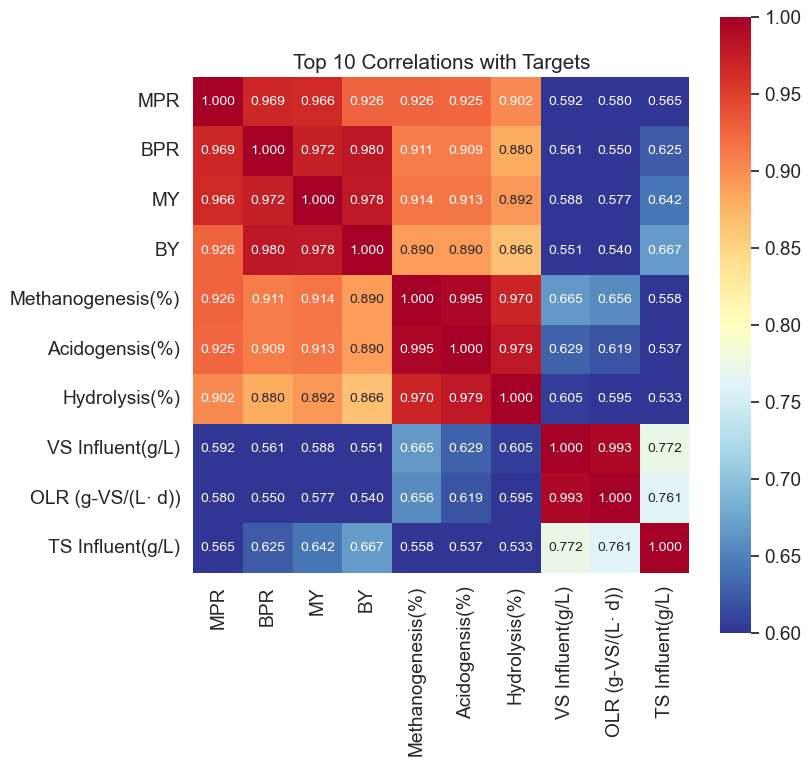

In [1587]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


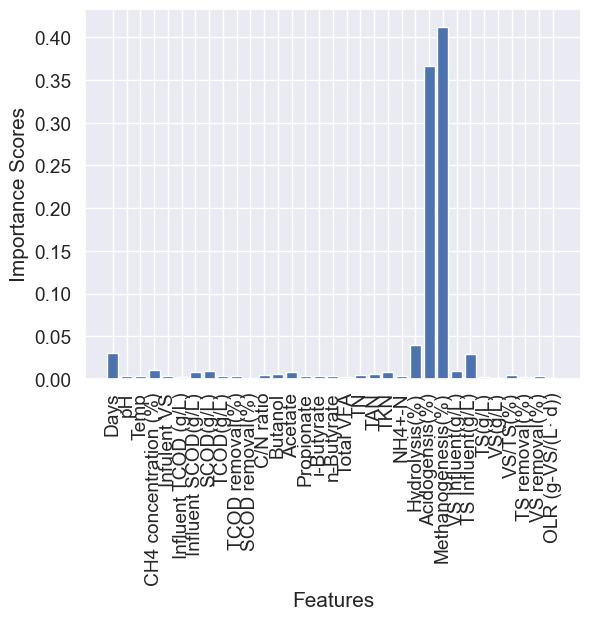

In [1588]:
#隨機森林塞選變


# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# 創建特徵和目標變量的數據集
X = train[features]
y = train[targets]

# 構建隨機森林模型
model = RandomForestRegressor(n_estimators=100)

# 訓練模型
model.fit(X, y)

# 提取變數重要性
importance_scores = model.feature_importances_

# 設置閾值為分位數
threshold = np.percentile(importance_scores, 80)

# 選擇重要性分數大於閾值的特徵
selected_features = [feat for feat, score in zip(features, importance_scores) if score > threshold]


# 可視化變數重要性


plt.bar(features, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()


In [1589]:
# 將特徵名稱和重要性分數組成一個字典
importance_dict = dict(zip(features, importance_scores))

# 根據重要性分數進行排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取前五個最重要的特徵變數
top_5_features = [feat for feat, _ in sorted_importance[:5]]

# 輸出前五個最重要的特徵變數
print("Top 5 most important features:")
for feature in top_5_features:
    print(feature)

Top 5 most important features:
Methanogenesis(%)
Acidogensis(%)
Hydrolysis(%)
Days
TS Influent(g/L)


In [1590]:
# 將特徵進行數學轉換
train['Methanogenesis_Squared'] = np.square(train['Methanogenesis(%)']) #平方
train['Methanogenesis_SquareRoot'] = np.sqrt(train['Methanogenesis(%)']) #平方根
train['Methanogenesis_Log'] = np.log(train['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Acidogensis_Squared'] = np.square(train['Acidogensis(%)']) #平方
train['Acidogensis_SquareRoot'] = np.sqrt(train['Acidogensis(%)']) #平方根
train['Acidogensis_Log'] = np.log(train['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
train['Interaction_Meth_Hydro'] = train['Methanogenesis(%)'] * train['Hydrolysis(%)'] #兩變數相乘
train['Interaction_Meth_Acido'] = train['Methanogenesis(%)'] * train['Acidogensis(%)'] #兩變數相乘
train['Sum_Meth_Hydro'] = train['Methanogenesis(%)'] + train['Hydrolysis(%)'] #兩變數相加
train['Sum_Meth_Acido'] = train['Methanogenesis(%)'] + train['Acidogensis(%)'] #兩變數相加
train['Ratio_Meth_Hydro'] = train['Methanogenesis(%)'] / (train['Hydrolysis(%)'] + 1)  # 除
train['Ratio_Meth_Acido'] = train['Methanogenesis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.719535 -3.052161 -0.089468              -0.560604    -0.556596   
1 -1.702840 -3.052161 -0.089468              -1.174598    -0.556596   
2 -1.686146 -2.855155 -0.089468              -1.379263    -0.556596   
3 -1.669451 -2.855155 -0.089468              -1.379263    -0.556596   
4 -1.652757 -2.658150 -0.089468              -1.583928    -0.556596   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.012546           -0.375303   0.909867   1.777937   
1            -1.012546           -0.375303   0.949068   1.667665   
2            -1.012546           -0.375303   1.027471   1.226577   
3            -1.012546           -0.375303   1.066672   1.134684   
4            -1.012546           -0.375303   1.086273   1.061169   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.119577              0.0   1.747440 -0.576391 -1.766876   
1        -2.064925      

In [1591]:
# 將特徵進行數學轉換
test['Methanogenesis_Squared'] = np.square(test['Methanogenesis(%)']) #平方
test['Methanogenesis_SquareRoot'] = np.sqrt(test['Methanogenesis(%)']) #平方根
test['Methanogenesis_Log'] = np.log(test['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Acidogensis_Squared'] = np.square(test['Acidogensis(%)']) #平方
test['Acidogensis_SquareRoot'] = np.sqrt(test['Acidogensis(%)']) #平方根
test['Acidogensis_Log'] = np.log(test['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
test['Interaction_Meth_Hydro'] = test['Methanogenesis(%)'] * test['Hydrolysis(%)'] #兩變數相乘
test['Interaction_Meth_Acido'] = test['Methanogenesis(%)'] * test['Acidogensis(%)'] #兩變數相乘
test['Sum_Meth_Hydro'] = test['Methanogenesis(%)'] + test['Hydrolysis(%)'] #兩變數相加
test['Sum_Meth_Acido'] = test['Methanogenesis(%)'] + test['Acidogensis(%)'] #兩變數相加
test['Ratio_Meth_Hydro'] = test['Methanogenesis(%)'] / (test['Hydrolysis(%)'] + 1)  # 除
test['Ratio_Meth_Acido'] = test['Methanogenesis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.719535 -3.052161 -0.089468              -0.560604    -0.556596   
1 -1.702840 -3.052161 -0.089468              -1.174598    -0.556596   
2 -1.686146 -2.855155 -0.089468              -1.379263    -0.556596   
3 -1.669451 -2.855155 -0.089468              -1.379263    -0.556596   
4 -1.652757 -2.658150 -0.089468              -1.583928    -0.556596   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.012546           -0.375303   0.909867   1.777937   
1            -1.012546           -0.375303   0.949068   1.667665   
2            -1.012546           -0.375303   1.027471   1.226577   
3            -1.012546           -0.375303   1.066672   1.134684   
4            -1.012546           -0.375303   1.086273   1.061169   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.119577              0.0   1.747440 -0.576391 -1.766876   
1        -2.064925      

In [1592]:
# # 確定目標變量和特徵變量
# targets = ["MPR", "MY", "BPR", "BY"]
# features = [col for col in train.columns if col not in targets]

In [1593]:
# #熱圖查看數據相關性，數值越接近 1 或 -1 的變數對其相關性越高，0為無相關。
# for target in targets :
#     k = 10
#     corrmat = train.corr()
#     cols = corrmat.nlargest(k, target)[target].index
#     cm = np.corrcoef(train[cols].values.T)
    
#     fig, ax = plt.subplots(figsize=(8, 8))
#     sns.set(font_scale=1.25)
#     hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
#                 yticklabels=cols.values, xticklabels=cols.values)
#     plt.title(f"Top {k} Correlations with {target}")
#     plt.show()

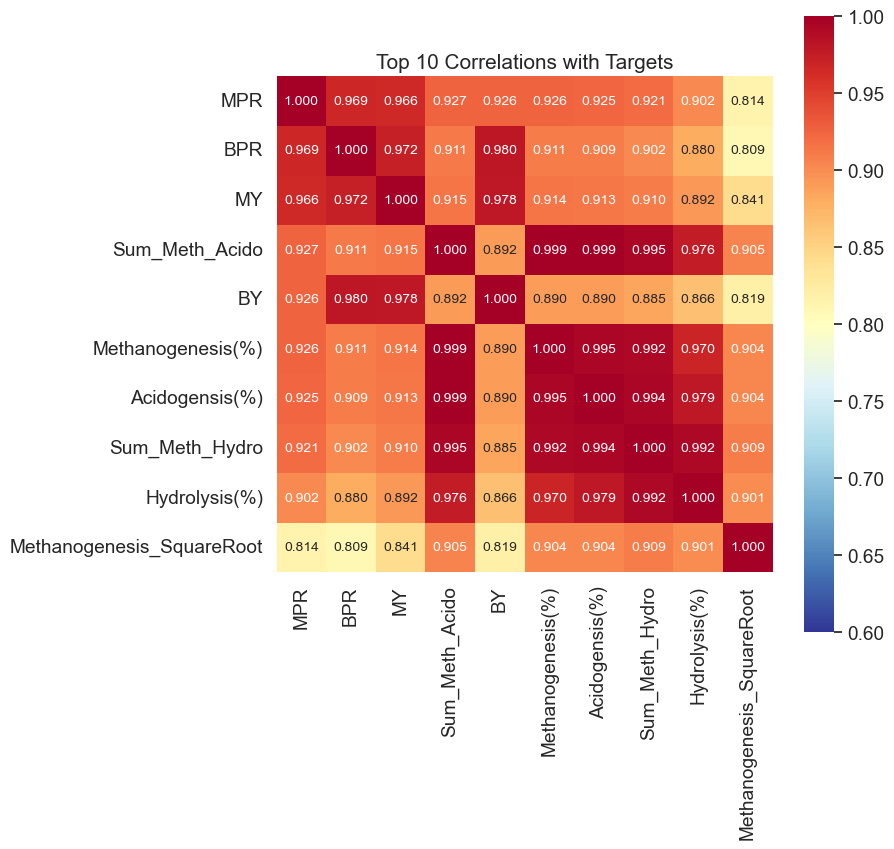

In [1594]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


In [1595]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  

for target in targets:
    print("Target:", target)

   
    X = train[features]
    y = train[target]

    # 使用L1正則化的線性回歸模型（Lasso回歸）作为特徵選擇模型
    lasso = Lasso(alpha=0.1)  
    lasso.fit(X, y)

    # 使用SelectFromModel選擇重要特徵
    sfm = SelectFromModel(lasso)
    X_selected = sfm.transform(X)

    # 索引(特徵)
    feature_indices = sfm.get_support(indices=True)

    # 索引內的特徵名
    selected_features = [features[i] for i in feature_indices]

    print("Selected Features:", selected_features)


Target: MPR
Selected Features: ['Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']
Target: MY
Selected Features: ['Days', 'Infulent VS', 'Influent SCOD(g/L)', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido']
Target: BPR
Selected Features: ['Infulent VS', 'Influent SCOD(g/L)', 'TN', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']
Target: BY
Selected Features: ['Infulent VS', 'Influent SCOD(g/L)', 'TN', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [1596]:
# #隨機森林塞選變
# from sklearn.ensemble import RandomForestRegressor

# # 準備特徵和目標變量
# features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#             'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#             'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#             'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#             'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#             'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#             'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

# targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# # 創建特徵和目標變量的數據集
# X = test[features]
# y = test[targets]

# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=100)

# # 訓練模型
# model.fit(X, y)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


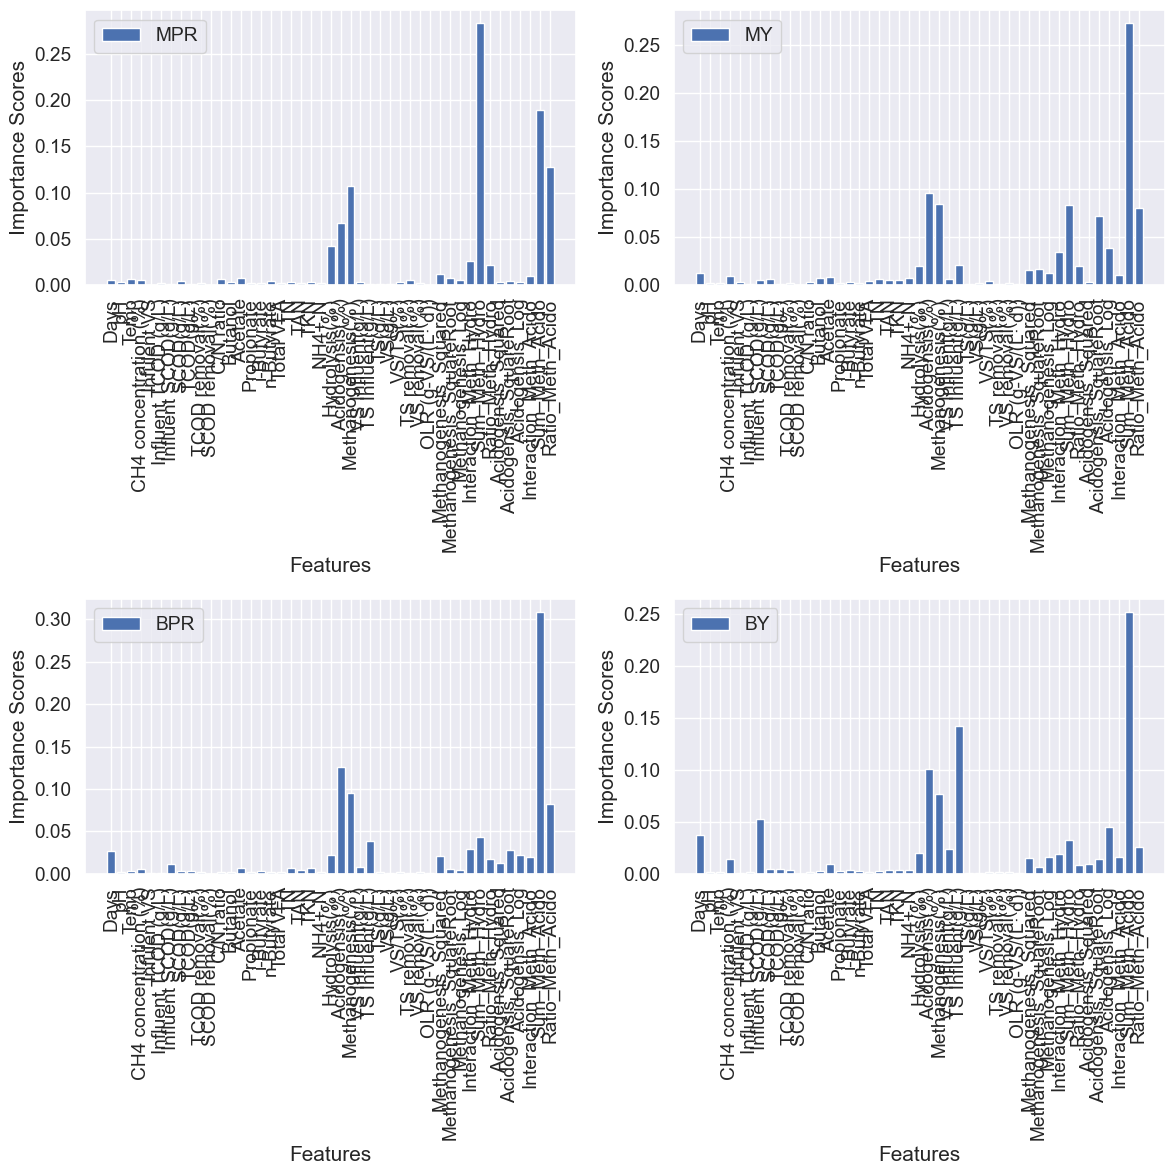

In [1597]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量

target_MPR = train['MPR']
target_MY = train['MY']
target_BPR = train['BPR']
target_BY = train['BY']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2

    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]

    # 构建随機森林模型
    model = RandomForestRegressor(n_estimators=100)

    # 訓練模型
    model.fit(X, y)

    # 提取變量重要性
    importance_scores = model.feature_importances_

    # 可視化變量重要性
    axes[row, col].bar(features, importance_scores, label=target)
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance Scores')
    axes[row, col].set_xticklabels(features, rotation=90)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

In [1598]:
#迭代特徵選擇
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=300)

rfe = RFE(estimator=model, n_features_to_select=12)  # 選擇保留的特徵數量

X_selected = rfe.fit_transform(X, y)

selected_feature_indexes = rfe.get_support(indices=True)
selected_features = [features[idx] for idx in selected_feature_indexes]



print("使用遞歸特徵消除 (RFE) 選擇特徵:")
print(selected_features)


使用遞歸特徵消除 (RFE) 選擇特徵:
['Days', 'Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)', 'TS Influent(g/L)', 'Methanogenesis_Squared', 'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Interaction_Meth_Acido', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [1599]:
# import seaborn as sns

# selected_features = ['Days', 'Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'TS Influent(g/L)', 'Methanogenesis_Squared', 'Interaction_Meth_Hydro',
#                      'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Interaction_Meth_Acido',
#                      'Sum_Meth_Acido', 'Ratio_Meth_Acido']
# targets = ['MPR', 'MY', 'BPR', 'BY']

# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# fig.suptitle('Correlation Heatmaps of Selected Features with Target Variables')

# vmin = 0.825  # Minimum value for the color scale
# vmax = 1.000  # Maximum value for the color scale

# for i, ax in enumerate(axes.flatten()):
#     target_variable = targets[i]
#     selected_data = train[selected_features + [target_variable]]
#     corr_matrix = selected_data.corr()

#     sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', ax=ax, vmin=vmin, vmax=vmax)
#     ax.set_title(f'Correlation with {target_variable}')

# plt.tight_layout()
# plt.show()


In [1600]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
scaler = RobustScaler()
X_selected_scaled = scaler.fit_transform(X_selected)
model.fit(X_selected_scaled, y)

RandomForestRegressor(n_estimators=300)

Target: MPR


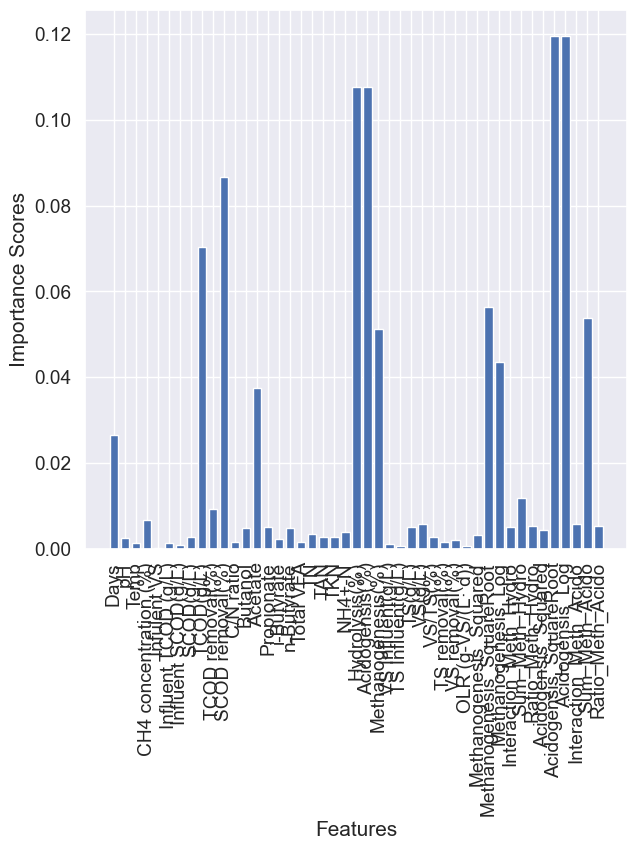

Target: MY


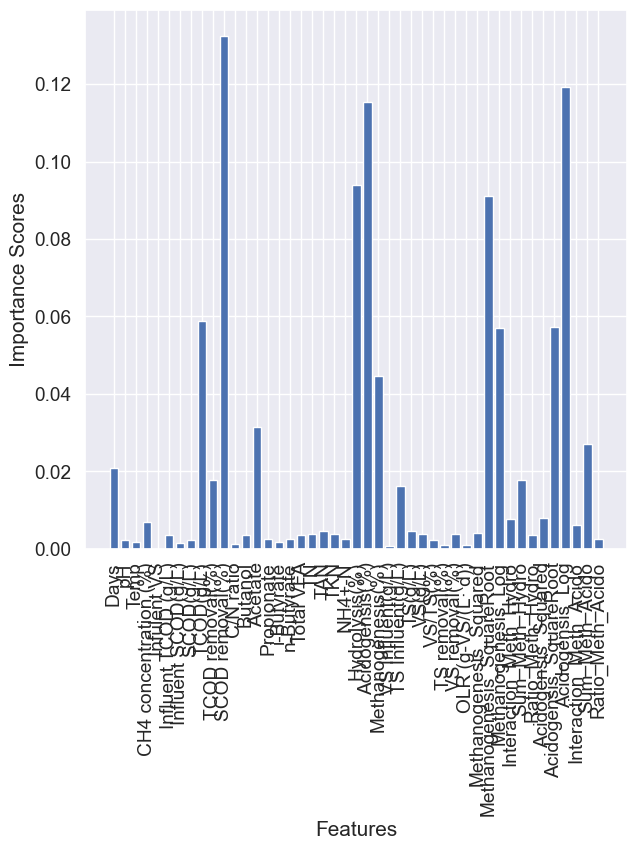

Target: BPR


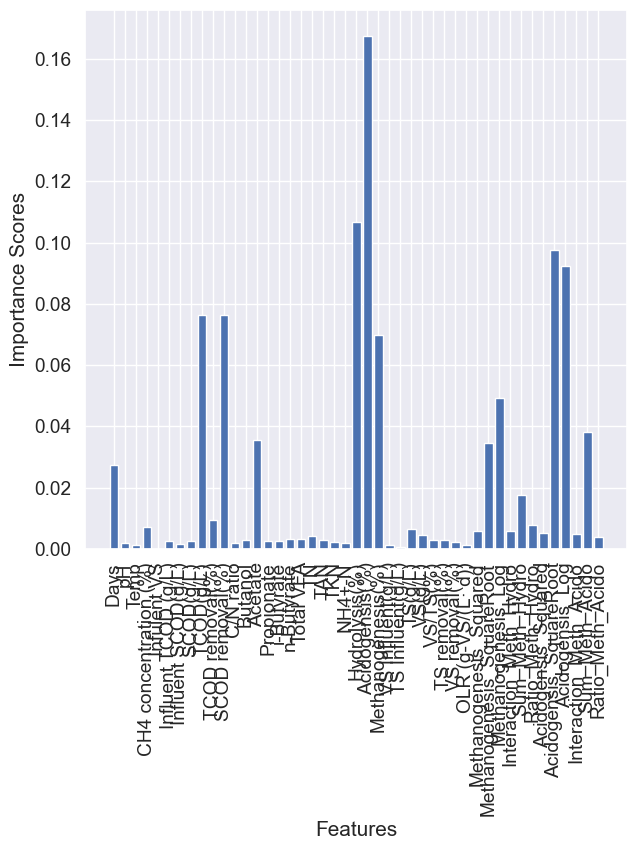

Target: BY


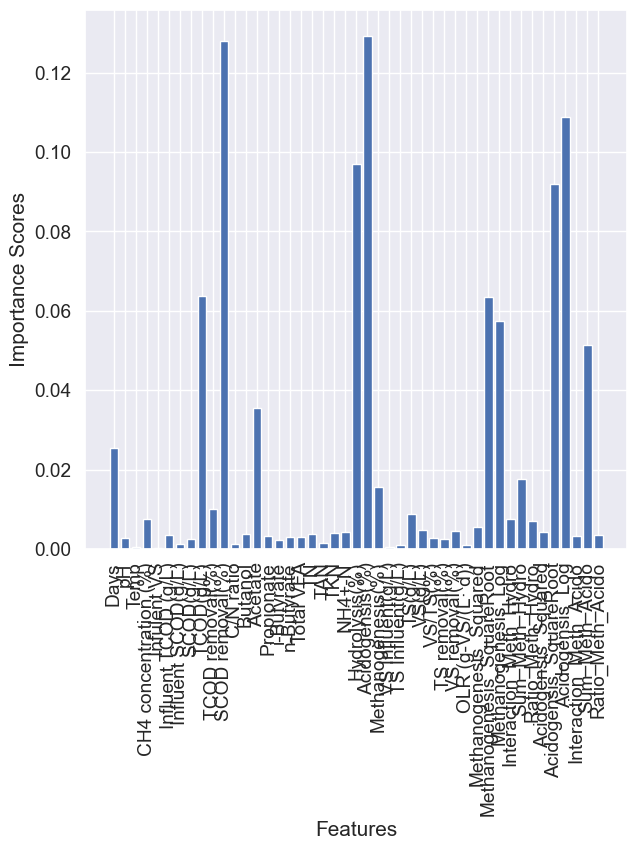

In [1601]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量


test_target_MPR = test['MPR']
test_target_MY = test['MY']
test_target_BPR = test['BPR']
test_target_BY = test['BY']

for target in targets:
    print("Target:", target)
    
    # 創建特徵和目標變量的數據集
    X_test = test[features]
    y_test = test[targets]
    
    # 建構隨機森林
    model = RandomForestRegressor(n_estimators=100)
    
    # 訓練模型
    model.fit(X_test, y_test)
    
    # 提取變量重要性
    importance_scores = model.feature_importances_
    
    # 可視化變量重要性
    plt.figure(figsize=(7, 7))
    plt.bar(features, importance_scores)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.xticks(rotation=90)
    plt.show()


In [1602]:
# #隨機森林塞選變數

# # 創建特徵和目標變量的數據集
# X_test = test[features]
# y_test = test[targets]
# test_target_MPR = test['MPR']
# test_target_MY = test['MY']
# test_target_BPR = test['BPR']
# test_target_BY = test['BY']
# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=300)

# # 訓練模型
# model.fit(X_test, y_test)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


In [1603]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin




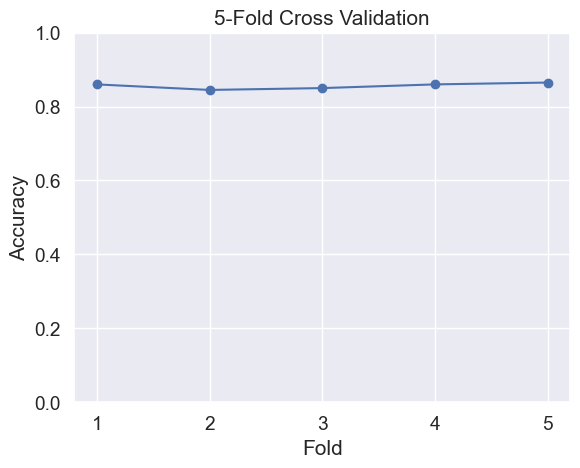

In [1604]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# 生成一個虛擬的分類資料集
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 建立一個決策樹分類器
classifier = DecisionTreeClassifier()

# 進行5折交叉驗證，取得每折的準確度
cv_scores = cross_val_score(classifier, X, y, cv=5)

# 設定圖表標題和軸標籤
plt.title("5-Fold Cross Validation")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

# 繪製每折交叉驗證的準確度
plt.plot(np.arange(1, 6), cv_scores, marker='o', linestyle='-')
plt.xticks(np.arange(1, 6))
plt.ylim(0, 1)

# 顯示圖表
plt.show()


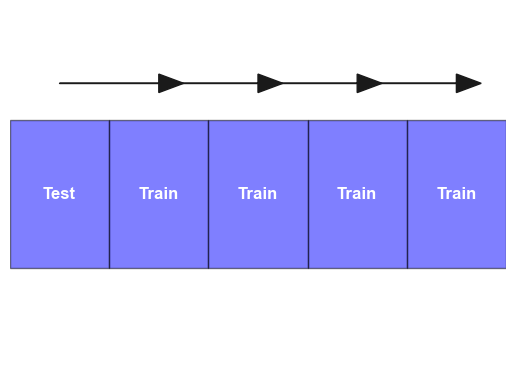

In [1605]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

# 创建五个部分
for i in range(5):
    ax.add_patch(patches.Rectangle((i*0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='blue', alpha=0.5))

# 标记训练集和测试集
for i in range(5):
    plt.text(i*0.2+0.1, 0.5, 'Test' if i==0 else 'Train', color='white', weight='bold', 
             size=12, ha='center', va='center')

# 添加箭头表示交叉验证过程
for i in range(1, 5):
    plt.arrow(i*0.2-0.1, 0.8, 0.2, 0, head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.show()


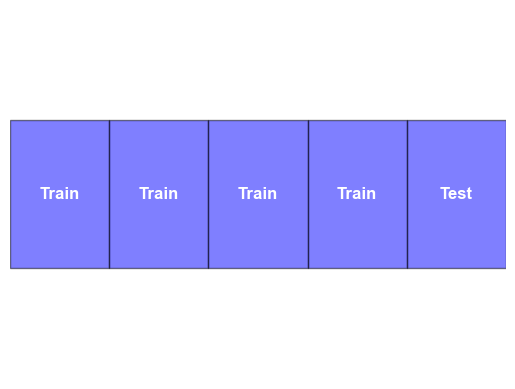

In [1606]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()

# 创建五个部分
rects = [patches.Rectangle((i*0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='blue', alpha=0.5) for i in range(5)]
texts = [plt.text(i*0.2+0.1, 0.5, 'Train', color='white', weight='bold', size=12, ha='center', va='center') for i in range(5)]
arrows = [plt.arrow(i*0.2+0.1, 0.8, 0.2, 0, head_width=0.05, head_length=0.05, fc='k', ec='k') for i in range(4)]

for rect in rects:
    ax.add_patch(rect)

# 更新函数
def update(num):
    for i in range(5):
        texts[i].set_text('Test' if i==num else 'Train')
    for i in range(4):
        arrows[i].set_visible(i == num)

# 创建动画
ani = FuncAnimation(fig, update, frames=range(5), repeat=True)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# 保存为GIF
ani.save('cross_validation.gif', writer=PillowWriter(fps=2))

plt.show()


In [1607]:
# 交叉驗證
n_folds = 5

# RMSE
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# MAE
def mae_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
    return mae

# R-squared
def r2_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
    return r2


In [1608]:
# 用來儲存模型的字典
models_dict = {}

In [1628]:

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    
    train_size = 0.8
    X = train[features].loc[target.index]
    y_selected = target

    # 使用train_test_split來拆分訓練集和驗證集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train, y_train)
    
    # 在驗證集上進行預測並評估性能
    y_pred = lasso.predict(X_valid)
    
    # 更改評估函數，使之適用於驗證集
    mae = mae_cv(lasso, X_train, y_train)
    
    rmse = rmsle_cv(lasso, X_train, y_train)
    
    r2 = r2_cv(lasso, X_train, y_train)

    print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    
    print("\nLasso RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    
    print("\nLasso R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_lasso'] = lasso
    
    
    #ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train, y_train)
    mae = mae_cv(ENet, X_train, y_train)
    rmse = rmsle_cv(ENet, X_train, y_train)
    r2 = r2_cv(ENet, X_train, y_train)
    print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nElasticNet R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_ENet'] = ENet
    
    #KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)
    KRR.fit(X_train, y_train)
    mae = mae_cv(KRR, X_train, y_train)
    rmse = rmsle_cv(KRR, X_train, y_train)
    r2 = r2_cv(KRR, X_train, y_train)
    print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nKernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_KRR'] = KRR
    
    #梯度提升
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                    max_depth=4, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state=5)
    GBoost.fit(X_train, y_train)
    mae = mae_cv(GBoost, X_train, y_train)
    rmse = rmsle_cv(GBoost, X_train, y_train)
    r2 = r2_cv(GBoost, X_train, y_train)
    print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nGradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_GBoost'] = GBoost
    
    #XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,     # colsamples_bytree 是列的採樣率    # gamma 是節點劃分所需的最小損失減少值
                             learning_rate=0.05, max_depth=3,               # learning_rate 是每次迭代的步長大小 # max_depth 是樹的最大深度
                             min_child_weight=1.7817,n_estimators=2200,     # min_child_weight 是子節點所需最小樣本數   # n_estimators 是樹的數量
                             subsample=0.5213,                              # subsample 是行的採樣率            
                             reg_alpha=0.4640, reg_lambda=0.8571,           # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
                             random_state=7, nthread=-1)                    # nthread 是 CPU 的使用數量
    #XGBoost
    model_xgb.fit(X_train, y_train)
    mae = mae_cv(model_xgb, X_train, y_train)
    rmse = rmsle_cv(model_xgb, X_train, y_train)
    r2 = r2_cv(model_xgb, X_train, y_train)
    print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nXgboost R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_xgb'] = model_xgb

    #lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                                learning_rate=0.05, n_estimators=720,
                                max_bin=55, subsample=0.8, subsample_freq=5,
                                colsample_bytree=0.2319,
                                min_child_samples=6, min_child_weight=11)

    model_lgb.fit(X_train, y_train)
    mae = mae_cv(model_lgb, X_train, y_train)
    rmse = score = rmsle_cv(model_lgb, X_train, y_train)
    r2 = r2_cv(model_lgb, X_train, y_train)
    print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
    print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_lgb'] = model_lgb

Target: MPR

Lasso MAE score: 0.2808 (0.0621)


Lasso RMSE score: 0.4319 (0.1366)


Lasso R^2 score: 0.8000 (0.1399)


ElasticNet MAE score: 0.2820 (0.0622)


ElasticNet RMSE score: 0.4331 (0.1366)


ElasticNet R^2 score: 0.7989 (0.1406)


Kernel Ridge RMSE score: 0.3963 (0.1460)


Kernel Ridge RMSE score: 1.0583 (0.7668)


Kernel Ridge R^2 score: -0.6511 (1.7898)


Gradient Boosting MAE score: 0.2557 (0.0446)


Gradient Boosting RMSE score: 0.3944 (0.0962)


Gradient Boosting R^2 score: 0.8453 (0.0736)


Xgboost MAE score: 0.2461 (0.0563)


Xgboost RMSE score: 0.3906 (0.1109)


Xgboost R^2 score: 0.8478 (0.0847)


LGB MAE score: 0.2807 (0.0593)


LGB RMSE score: 0.4287 (0.1066)


LGB R^2 score: 0.8194 (0.0830)

Target: MY

Lasso MAE score: 0.2767 (0.0626)


Lasso RMSE score: 0.4373 (0.1392)


Lasso R^2 score: 0.7934 (0.1386)


ElasticNet MAE score: 0.2781 (0.0623)


ElasticNet RMSE score: 0.4384 (0.1392)


ElasticNet R^2 score: 0.7925 (0.1392)


Kernel Ridge RMSE score: 0.3845 (0.1394

In [1610]:
# # 對 LightGBM 進行參數優化
# lgb_params = {
#     'num_leaves': list(range(8, 92, 4)),
#     'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
#     'n_estimators': list(range(50, 1000, 50)),
#     'max_bin': list(range(10, 100, 5)),
#     'subsample': list(np.linspace(0.1, 1, 1000)),
#     'subsample_freq': list(range(1, 10, 1)),
#     'colsample_bytree': list(np.linspace(0.1, 1, 1000)),
#     'min_child_samples': list(range(5, 500, 5)),
# }

# lgb_optimized = RandomizedSearchCV(model_lgb, lgb_params, cv=5, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1)
# lgb_optimized.fit(X_train, y_train)
# print("Best parameters for LGB: ", lgb_optimized.best_params_)

# # 對 XGBoost 進行參數優化
# xgb_params = {
#     'colsample_bytree': list(np.linspace(0.1, 1, 1000)),
#     'gamma': list(np.linspace(0, 0.5, 500)),
#     'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
#     'max_depth': list(range(2, 10, 1)),
#     'min_child_weight': list(range(1, 10, 1)),
#     'n_estimators': list(range(100, 2000, 100)),
#     'subsample': list(np.linspace(0.1, 1, 1000)),
#     'reg_alpha': list(np.linspace(0, 1, 1000)),
#     'reg_lambda': list(np.linspace(0, 1, 1000)),
# }

# xgb_optimized = RandomizedSearchCV(model_xgb, xgb_params, cv=5, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1)
# xgb_optimized.fit(X_train, y_train)
# print("Best parameters for XGB: ", xgb_optimized.best_params_)


In [1611]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
        
#     # Lasso
#     lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
#     lasso.fit(X, y_selected)
#     y_pred = lasso.predict(X)
#     mae = mae_cv(lasso, X, y_selected)
    
#     rmse = rmsle_cv(lasso, X, y_selected)
    
#     r2 = r2_cv(lasso, X, y_selected)
#     print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    
#     print("\nLasso RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    
#     print("\nLasso R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lasso'] = lasso

In [1612]:
# #Lasso
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005,random_state=1))

# #Lasso MAE得分
# score_mae = mae_cv(lasso, X_selected_scaled, y_selected)
# print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #Lasso RMSE得分
# score = rmsle_cv(lasso, X_selected_scaled, y_selected)
# print("\nLsso RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [1613]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #ENet
#     ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#     ENet.fit(X, y_selected)
#     mae = mae_cv(ENet, X, y_selected)
#     rmse = rmsle_cv(ENet, X, y_selected)
#     r2 = r2_cv(ENet, X, y_selected)
#     print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nElasticNet R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_ENet'] = ENet

In [1614]:
# #ENet
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# #ENet MAE得分
# score_mae = mae_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #ENet RMSE得分
# score = rmsle_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [1615]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #KRR
#     KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)
#     KRR.fit(X, y_selected)
#     mae = mae_cv(KRR, X, y_selected)
#     rmse = rmsle_cv(KRR, X, y_selected)
#     r2 = r2_cv(KRR, X, y_selected)
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nKernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_KRR'] = KRR

In [1616]:
# #KRR
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)

# #KRR MAE得分
# score_mae = mae_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #KRR RMSE得分
# score = rmsle_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [1617]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #梯度提升
#     GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,    # 樹的數量（n_estimators）    # 學習率（learning_rate）
#                                     max_depth=4, max_features='sqrt',            # 樹的最大深度（max_depth）    # 特徵的最大數量（max_features）
#                                     min_samples_leaf=15, min_samples_split=10,  # 每個葉子節點最小樣本數（min_samples_leaf）    # 節點分裂所需最小樣本數（min_samples_split）
#                                     loss='huber', random_state=5)               # 損失函數（loss）
#     #GBoost 得分
#     GBoost.fit(X, y_selected)
#     mae = mae_cv(GBoost, X, y_selected)
#     rmse = rmsle_cv(GBoost, X, y_selected)
#     r2 = r2_cv(GBoost, X, y_selected)
#     print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nGradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_GBoost'] = GBoost

In [1618]:
# #梯度提升
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state=5)
# # 樹的數量（n_estimators）
# # 學習率（learning_rate）
# # 樹的最大深度（max_depth）
# # 特徵的最大數量（max_features）
# # 每個葉子節點最小樣本數（min_samples_leaf）
# # 節點分裂所需最小樣本數（min_samples_split）
# # 損失函數（loss）

# #GBoost MAE得分
# score_mae = mae_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #GBoost RMSE得分
# score = rmsle_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [1619]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #XGB
#     model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,     # colsamples_bytree 是列的採樣率    # gamma 是節點劃分所需的最小損失減少值
#                              learning_rate=0.05, max_depth=3,               # learning_rate 是每次迭代的步長大小 # max_depth 是樹的最大深度
#                              min_child_weight=1.7817,n_estimators=2200,     # min_child_weight 是子節點所需最小樣本數   # n_estimators 是樹的數量
#                              subsample=0.5213,                              # subsample 是行的採樣率            
#                              reg_alpha=0.4640, reg_lambda=0.8571,           # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
#                              random_state=7, nthread=-1)                    # nthread 是 CPU 的使用數量
#     #XGBoost
#     model_xgb.fit(X, y_selected)
#     mae = mae_cv(model_xgb, X, y_selected)
#     rmse = rmsle_cv(model_xgb, X, y_selected)
#     r2 = r2_cv(model_xgb, X, y_selected)
#     print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nXgboost R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_xgb'] = model_xgb

In [1620]:
# warnings.filterwarnings("ignore", category=UserWarning)
# #XGB
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
#                              learning_rate=0.05, max_depth=3,
#                              min_child_weight=1.7817,n_estimators=2200,
#                              subsample=0.5213,silent=1,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              random_state=7, nthread=-1)
# # colsamples_bytree 是列的採樣率
# # gamma 是節點劃分所需的最小損失減少值
# # learning_rate 是每次迭代的步長大小
# # max_depth 是樹的最大深度
# # min_child_weight 是子節點所需最小樣本數
# # n_estimators 是樹的數量
# # subsample 是行的採樣率
# # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
# # random_state 是隨機種子
# # nthread 是 CPU 的使用數量

# #XGBoost MAE得分
# score_mae = mae_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #XGB RMSE得分
# score = rmsle_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [1621]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    
#     #lgb
#     model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
#                                 learning_rate=0.05, n_estimators=720,
#                                 max_bin=55, subsample=0.8, subsample_freq=5,
#                                 colsample_bytree=0.2319,
#                                 min_child_samples=6, min_child_weight=11)

#     model_lgb.fit(X, y_selected)
#     mae = mae_cv(model_lgb, X, y_selected)
#     rmse = score = rmsle_cv(model_lgb, X, y_selected)
#     r2 = r2_cv(model_lgb, X, y_selected)
#     print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
#     print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lgb'] = model_lgb

In [1622]:
# #lgb
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# #LightGB MAE得分
# score_mae = mae_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #LightGB RMSE得分
# score = rmsle_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [1630]:
# 對於test進行相同的特徵選擇
X_test_selected = test[features]

# 對每個目標變量進行預測
for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    y_test = test[target_name]
    
    print("Target:", target_name)
    
    # Lasso
    y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    std_lasso = np.std(y_pred_lasso)
    print("Lasso R^2: {:.4f} ({:.4f})".format(r2_lasso, std_lasso))
    print("Lasso MAE: {:.4f} ({:.4f})".format(mae_lasso, std_lasso))
    print("Lasso RMSE: {:.4f} ({:.4f})".format(rmse_lasso, std_lasso))
    
    # ENet
    y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
    mae_ENet = mean_absolute_error(y_test, y_pred_ENet)
    rmse_ENet = np.sqrt(mean_squared_error(y_test, y_pred_ENet))
    r2_ENet = r2_score(y_test, y_pred_ENet)
    std_ENet = np.std(y_pred_ENet)
    print("ElasticNet R^2: {:.4f} ({:.4f})".format(r2_ENet, std_ENet))
    print("ElasticNet MAE: {:.4f} ({:.4f})".format(mae_ENet, std_ENet))
    print("ElasticNet RMSE: {:.4f} ({:.4f})".format(rmse_ENet, std_ENet))
    
    # KRR
    y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
    mae_KRR = mean_absolute_error(y_test, y_pred_KRR)
    rmse_KRR = np.sqrt(mean_squared_error(y_test, y_pred_KRR))
    r2_KRR = r2_score(y_test, y_pred_KRR)
    std_KRR = np.std(y_pred_KRR)
    print("Kernel Ridge R^2: {:.4f} ({:.4f})".format(r2_KRR, std_KRR))
    print("Kernel Ridge MAE: {:.4f} ({:.4f})".format(mae_KRR, std_KRR))
    print("Kernel Ridge RMSE: {:.4f} ({:.4f})".format(rmse_KRR, std_KRR))
    
    # GBoost
    y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
    mae_GBoost = mean_absolute_error(y_test, y_pred_GBoost)
    rmse_GBoost = np.sqrt(mean_squared_error(y_test, y_pred_GBoost))
    r2_GBoost = r2_score(y_test, y_pred_GBoost)
    std_GBoost = np.std(y_pred_GBoost)
    print("Gradient Boosting R^2: {:.4f} ({:.4f})".format(r2_GBoost, std_GBoost))
    print("Gradient Boosting MAE: {:.4f} ({:.4f})".format(mae_GBoost, std_GBoost))
    print("Gradient Boosting RMSE: {:.4f} ({:.4f})".format(rmse_GBoost, std_GBoost))
    
    # XGB
    y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    std_xgb = np.std(y_pred_xgb)
    print("XGBoost R^2: {:.4f} ({:.4f})".format(r2_xgb, std_xgb))
    print("XGBoost MAE: {:.4f} ({:.4f})".format(mae_xgb, std_xgb))
    print("XGBoost RMSE: {:.4f} ({:.4f})".format(rmse_xgb, std_xgb))
    
    # lgb
    y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    std_lgb = np.std(y_pred_lgb)
    print("LightGBM R^2: {:.4f} ({:.4f})".format(r2_lgb, std_lgb))
    print("LightGBM MAE: {:.4f} ({:.4f})".format(mae_lgb, std_lgb))
    print("LightGBM RMSE: {:.4f} ({:.4f})".format(rmse_lgb, std_lgb))


Target: MPR
Lasso R^2: 0.8298 (1.0505)
Lasso MAE: 0.3019 (1.0505)
Lasso RMSE: 0.4116 (1.0505)
ElasticNet R^2: 0.8300 (1.0496)
ElasticNet MAE: 0.3016 (1.0496)
ElasticNet RMSE: 0.4114 (1.0496)
Kernel Ridge R^2: 0.5915 (1.1853)
Kernel Ridge MAE: 0.3592 (1.1853)
Kernel Ridge RMSE: 0.6376 (1.1853)
Gradient Boosting R^2: 0.7996 (1.0188)
Gradient Boosting MAE: 0.3019 (1.0188)
Gradient Boosting RMSE: 0.4466 (1.0188)
XGBoost R^2: 0.8382 (0.9301)
XGBoost MAE: 0.2773 (0.9301)
XGBoost RMSE: 0.4013 (0.9301)
LightGBM R^2: 0.8044 (1.0001)
LightGBM MAE: 0.3054 (1.0001)
LightGBM RMSE: 0.4412 (1.0001)
Target: MY
Lasso R^2: 0.7553 (1.1060)
Lasso MAE: 0.3769 (1.1060)
Lasso RMSE: 0.4935 (1.1060)
ElasticNet R^2: 0.7548 (1.1046)
ElasticNet MAE: 0.3770 (1.1046)
ElasticNet RMSE: 0.4940 (1.1046)
Kernel Ridge R^2: 0.5313 (1.1927)
Kernel Ridge MAE: 0.4002 (1.1927)
Kernel Ridge RMSE: 0.6830 (1.1927)
Gradient Boosting R^2: 0.8001 (1.0375)
Gradient Boosting MAE: 0.3224 (1.0375)
Gradient Boosting RMSE: 0.4460 (1.0375

In [1624]:
# # 對於test進行相同的特徵選擇
# X_test_selected = test[features]


# # 對每個目標變量進行預測
# for target_name in ['MPR', 'MY', 'BPR', 'BY']:
#     y_test = test[target_name]
    
#     print("Target:", target_name)
    
#     # Lasso
#     y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
#     print("Lasso predictions:", y_pred_lasso)
    
#     # ENet
#     y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
#     print("ElasticNet predictions:", y_pred_ENet)
    
#     # KRR
#     y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
#     print("Kernel Ridge predictions:", y_pred_KRR)
    
#     # GBoost
#     y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
#     print("Gradient Boosting predictions:", y_pred_GBoost)
    
#     # XGB
#     y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
#     print("Xgboost predictions:", y_pred_xgb)
    
#     # LGB
#     y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
#     print("LGB predictions:", y_pred_lgb)

In [1631]:
#集成模型
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 初始化函數，將傳入的模型列表保存為類的属性
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # 使用新的模型對數據進行訓練
        for model in self.models:
            model.fit(X, y)
 
        return self
    
    #對新的模型進行預測，並將預測結果進行均值計算，作為最終結果
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)  

In [1642]:
from sklearn.model_selection import cross_val_score

averaged_models = AveragingModels(models = (model_lgb, GBoost, model_xgb ,lasso))

models_dict = {}
cv = 5 # 假設進行5折交叉驗證

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    X = train[features].loc[target.index]
    y_selected = target

    # 使用 train_test_split 將數據分為訓練集和驗證集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # 在驗證集上進行預測
    y_pred = averaged_models.predict(X_valid)

    # 進行交叉驗證，並計算 MAE
    mae_scores = -cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

    # 進行交叉驗證，並計算 RMSE
    rmse_scores = np.sqrt(-cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_squared_error", cv=cv))

    # 進行交叉驗證，並計算 R^2
    r2_scores = cross_val_score(averaged_models, X_train, y_train, scoring="r2", cv=cv)

    print("averaged_models MAE score: {:.4f} ({:.4f})".format(mae_scores.mean(), mae_scores.std()))
    print("averaged_models RMSE score: {:.4f} ({:.4f})".format(rmse_scores.mean(), rmse_scores.std()))
    print("averaged_models R^2 score: {:.4f} ({:.4f})".format(r2_scores.mean(), r2_scores.std()))


Target: MPR
averaged_models MAE score: 0.2497 (0.0561)
averaged_models RMSE score: 0.3934 (0.1182)
averaged_models R^2 score: 0.8342 (0.0971)
Target: MY
averaged_models MAE score: 0.2445 (0.0650)
averaged_models RMSE score: 0.3503 (0.1011)
averaged_models R^2 score: 0.8712 (0.0623)
Target: BPR
averaged_models MAE score: 0.2394 (0.0432)
averaged_models RMSE score: 0.3783 (0.0931)
averaged_models R^2 score: 0.8517 (0.0635)
Target: BY
averaged_models MAE score: 0.2104 (0.0408)
averaged_models RMSE score: 0.3102 (0.0791)
averaged_models R^2 score: 0.9003 (0.0419)


In [1646]:
averaged_models = AveragingModels(models=(model_lgb, GBoost, model_xgb ,lasso))

models_dict = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    X_test = test[features]
    y_test = target

    # 在測試集上進行預測
    y_pred = averaged_models.predict(X_test)

    # 計算 MAE
    mae = mean_absolute_error(y_test, y_pred)
    std_mae = np.std(y_pred)
    
    # 計算 RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    std_rmse = np.std(y_pred)
    
    # 計算 R^2
    r2 = r2_score(y_test, y_pred)
    std_r2 = np.std(y_pred)

    print("averaged_models MAE score: {:.4f} ({:.4f})".format(mae, std_mae))
    print("averaged_models RMSE score: {:.4f} ({:.4f})".format(rmse, std_rmse))
    print("averaged_models R^2 score: {:.4f} ({:.4f})".format(r2, std_r2))
    models_dict[target_name + '_averaged'] = averaged_models


Target: MPR
averaged_models MAE score: 0.5314 (0.9967)
averaged_models RMSE score: 0.6693 (0.9967)
averaged_models R^2 score: 0.5498 (0.9967)
Target: MY
averaged_models MAE score: 0.4522 (0.9967)
averaged_models RMSE score: 0.5855 (0.9967)
averaged_models R^2 score: 0.6555 (0.9967)
Target: BPR
averaged_models MAE score: 0.4266 (0.9967)
averaged_models RMSE score: 0.5596 (0.9967)
averaged_models R^2 score: 0.6853 (0.9967)
Target: BY
averaged_models MAE score: 0.4054 (0.9967)
averaged_models RMSE score: 0.5298 (0.9967)
averaged_models R^2 score: 0.7179 (0.9967)


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import KFold, train_test_split
# import numpy as np

# # 交叉驗證
# n_folds = 5

# # RMSE
# def rmsle_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
#     return rmse

# # MAE
# def mae_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
#     return mae

# # R-squared
# def r2_cv(model, X, y):
#     kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
#     r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
#     return r2

# # 用來儲存模型的字典
# models_dict = {}

# # 定義堆疊模型的訓練函數
# def stack_models(base_models, meta_model, X, y, X_test):
#     # 用來儲存每個基模型在訓練集上的預測結果
#     train_preds = np.zeros((X.shape[0], len(base_models)))
#     # 用來儲存每個基模型在測試集上的預測結果
#     test_preds = np.zeros((X_test.shape[0], len(base_models)))
    
#     # 使用 K-fold 交叉驗證訓練每個基模型並獲取預測結果
#     for i, model in enumerate(base_models):
#         model.fit(X, y)
#         train_preds[:, i] = model.predict(X)
#         test_preds[:, i] = model.predict(X_test)
    
#     # 使用 meta_model 將基模型的預測結果進行結合並訓練
#     meta_model.fit(train_preds, y)
#     # 獲取最終的預測結果
#     stacked_predictions = meta_model.predict(test_preds)
    
#     return stacked_predictions

# # 基模型
# model_lgb = lgb.LGBMRegressor(n_estimators=3000, learning_rate=0.05,
#                                     max_depth=4, max_features='sqrt',
#                                     min_samples_leaf=15, min_samples_split=10,
#                                     loss='huber', random_state=5)
# GBoost = GradientBoostingRegressor(learning_rate=0.05, max_depth=3,
#                                    min_samples_split=10, min_samples_leaf=15,
#                                    n_estimators=2200, subsample=0.5213,
#                                    random_state=7)
# model_xgb = xgb.XGBRegressor(objective='reg:squarederror', num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin=55, subsample=0.8, subsample_freq=5,
#                              colsample_bytree=0.2319,
#                              min_child_samples=6, min_child_weight=11)

# # 元模型
# meta_model = Lasso(alpha=0.0005, random_state=1)

# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target

#     # 使用 train_test_split 將訓練集分為訓練集和驗證集
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)
    
#     # 執行堆疊模型訓練和預測
#     stacked_predictions = stack_models([model_lgb, GBoost, model_xgb], meta_model, X_train, y_train, X_valid)
    
#     # 評估模型的性能
#     mae = mean_absolute_error(y_valid, stacked_predictions)
#     rmse = np.sqrt(mean_squared_error(y_valid, stacked_predictions))
#     r2 = r2_score(y_valid, stacked_predictions)
    
#     print("\nStacked Models MAE score: {:.4f}\n".format(mae))
#     print("\nStacked Models RMSE score: {:.4f}\n".format(rmse))
#     print("\nStacked Models R^2 score: {:.4f}\n".format(r2))
    
#     # 儲存模型
#     models_dict[target_name + '_stacked'] = ([model_lgb, GBoost, model_xgb], meta_model)

#     # 單獨訓練 Lasso 模型
#     lasso = Lasso(alpha=0.0005, random_state=1)
#     lasso.fit(X_train, y_train)
    
#     # 在驗證集上進行預測並評估性能
#     y_pred = lasso.predict(X_valid)
#     mae = mean_absolute_error(y_valid, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
#     r2 = r2_score(y_valid, y_pred)

#     print("\nLasso MAE score: {:.4f}\n".format(mae))
#     print("\nLasso RMSE score: {:.4f}\n".format(rmse))
#     print("\nLasso R^2 score: {:.4f}\n".format(r2))

#     models_dict[target_name + '_lasso'] = lasso
